In [2]:
# Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
df_shows = pd.read_csv('tv_shows.csv')
df_movies = pd.read_csv('movies.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
df_shows.head()

,Title,Years,Content Rating,Total Ratings,IMDb Rating
0,1. Game of Thrones,TV-MA,2011–2019,(2.4M),9.2
1,2. Breaking Bad,TV-MA,2008–2013,(2.3M),9.5
2,3. Stranger Things,TV-14,2016–2025,(1.4M),8.7
3,4. Friends,TV-14,1994–2004,(1.1M),8.9
4,5. The Walking Dead,TV-MA,2010–2022,(1.1M),8.1


In [5]:
df_movies.head()

,Title,Year,Metascore,Total Ratings,Rating,Duration,Parental Rating
0,1. The Gorge,PG-13,57.0,(76K),6.8,2025,2h 7m
1,2. The Brutalist,R,90.0,(59K),7.6,2024,3h 34m
2,3. The Monkey,R,61.0,(16K),6.4,2025,1h 38m
3,4. Captain America: Brave New World,PG-13,42.0,(65K),6.0,2025,1h 58m
4,5. Nosferatu,R,78.0,(171K),7.3,2024,2h 12m


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [6]:
df_shows.describe()

,IMDb Rating
count,6150.000000
mean,7.302065
std,1.036168
min,1.000000
25%,6.800000
50%,7.400000
75%,8.000000
max,9.900000


In [7]:
df_shows.describe(include='object')

,Title,Years,Content Rating,Total Ratings
count,6150,4943,6150,6150
unique,6150,21,830,349
top,6150. Tanked,TV-14,2023–,(2.1K)
freq,1,1679,178,165


In [8]:
df_shows.shape

(6150, 5)

In [9]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           6150 non-null   object 
 1   Years           4943 non-null   object 
 2   Content Rating  6150 non-null   object 
 3   Total Ratings   6150 non-null   object 
 4   IMDb Rating     6150 non-null   float64
dtypes: float64(1), object(4)
memory usage: 240.4+ KB


In [10]:
df_movies.describe()

,Metascore,Rating
count,5186.000000,5934.000000
mean,59.642113,6.613397
std,17.493516,0.977233
min,1.000000,1.900000
25%,47.000000,6.100000
50%,60.000000,6.700000
75%,72.000000,7.300000
max,100.000000,9.600000


In [11]:
df_movies.describe(include='object')

,Title,Year,Total Ratings,Duration,Parental Rating
count,6150,5628,5934,6096,5988
unique,6150,21,955,105,163
top,6150. I Am Still Here,R,(13K),2024,1h 40m
freq,1,2549,56,489,166


In [12]:
df_movies.shape

(6150, 7)

In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            6150 non-null   object 
 1   Year             5628 non-null   object 
 2   Metascore        5186 non-null   float64
 3   Total Ratings    5934 non-null   object 
 4   Rating           5934 non-null   float64
 5   Duration         6096 non-null   object 
 6   Parental Rating  5988 non-null   object 
dtypes: float64(2), object(5)
memory usage: 336.5+ KB


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [14]:
# The data is scraped directly from the IMDb website, ensuring its authenticity and reliability.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [15]:
# The dataset contains information on the most popular movies and TV shows up to the current year.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [16]:
# Since the data is sourced from a single platform, it maintains consistency in formatting and criteria.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [17]:
# The scraped data is relevant as it aligns with our objective of analyzing movies and TV shows.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [18]:
df_shows.duplicated().sum()

np.int64(0)

In [19]:
df_movies.duplicated().sum()

np.int64(0)

In [20]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [21]:
df_shows.isnull().sum()

Title                0
Years             1207
Content Rating       0
Total Ratings        0
IMDb Rating          0
dtype: int64

In [22]:
df_movies.isnull().sum().sort_values(ascending=False)

Metascore          964
Year               522
Total Ratings      216
Rating             216
Parental Rating    162
Duration            54
Title                0
dtype: int64

In [23]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [24]:
# check columns types 
df_shows.dtypes

Title              object
Years              object
Content Rating     object
Total Ratings      object
IMDb Rating       float64
dtype: object

In [25]:
df_movies.dtypes

Title               object
Year                object
Metascore          float64
Total Ratings       object
Rating             float64
Duration            object
Parental Rating     object
dtype: object

In [26]:
# go to clean them 

In [27]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [28]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [29]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [30]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


### df_shows

In [31]:
def split_title_and_rank(df, title_col='Title'):
    """
    Splits the specified title column into two new columns: 'Rank' and 'Movie'.
    
    Assumes that each title entry is in the format: "rank. MovieName"
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the title column.
        title_col (str): Name of the column to split (default 'Title').
    
    Returns:
        pd.DataFrame: DataFrame with new 'Rank' and 'Movie' columns.
    """
    # Split the column into two parts using the first occurrence of '.'
    df[['Rank', 'Movie']] = df[title_col].str.split('.', n=1, expand=True)
    
    # Remove extra whitespace from the new columns
    df['Rank'] = df['Rank'].str.strip()
    df['Movie'] = df['Movie'].str.strip()
    
    return df


shows = split_title_and_rank(df_shows)

shows.head()

,Title,Years,Content Rating,Total Ratings,IMDb Rating,Rank,Movie
0,1. Game of Thrones,TV-MA,2011–2019,(2.4M),9.2,1,Game of Thrones
1,2. Breaking Bad,TV-MA,2008–2013,(2.3M),9.5,2,Breaking Bad
2,3. Stranger Things,TV-14,2016–2025,(1.4M),8.7,3,Stranger Things
3,4. Friends,TV-14,1994–2004,(1.1M),8.9,4,Friends
4,5. The Walking Dead,TV-MA,2010–2022,(1.1M),8.1,5,The Walking Dead


In [32]:
df_shows.rename(columns={'Years': 'Content Rating', 'Content Rating': 'Years'}, inplace=True)
df_shows.drop('Title', axis=1, inplace=True)

In [33]:
df_shows.rename(columns={'Movie': 'Series'}, inplace=True)

In [34]:
ordered_columns = ['Rank', 'Series', 'Years', 'Content Rating', 'IMDb Rating', 'Total Ratings']
df_shows = df_shows[ordered_columns].copy()
df_shows

,Rank,Series,Years,Content Rating,IMDb Rating,Total Ratings
0,1,Game of Thrones,2011–2019,TV-MA,9.2,(2.4M)
1,2,Breaking Bad,2008–2013,TV-MA,9.5,(2.3M)
2,3,Stranger Things,2016–2025,TV-14,8.7,(1.4M)
3,4,Friends,1994–2004,TV-14,8.9,(1.1M)
4,5,The Walking Dead,2010–2022,TV-MA,8.1,(1.1M)
...,...,...,...,...,...,...
6145,6146,Spider-Man,1981–1982,TV-Y7,6.8,(2.1K)
6146,6147,Complete Savages,2004–2005,TV-PG,7.3,(2.1K)
6147,6148,A Shot at Love with Tila Tequila,2007–2008,NaN,3.1,(2.1K)
6148,6149,Ariza,2020–2021,NaN,6.3,(2.1K)


In [35]:
df_shows.duplicated().sum()

np.int64(0)

In [36]:
df_shows.isnull().sum().sort_values(ascending=False)

Content Rating    1207
Rank                 0
Series               0
Years                0
IMDb Rating          0
Total Ratings        0
dtype: int64

In [37]:
# Standardize text to avoid issues
df_shows["Years"] = df_shows["Years"].astype(str).fillna("")  # Ensure all values are strings
df_shows["Years"] = df_shows["Years"].str.replace("–", "-")  # Replace en dash with hyphen
df_shows["Years"] = df_shows["Years"].str.replace("—", "-")  # Replace em dash with hyphen

def parse_years(year_str, artificial_end=2025):
    """
    Converts "Years" column into (start_year, end_year, ongoing).
    """
    year_str = year_str.strip()
    
    if "-" in year_str:
        start_part, end_part = year_str.split("-", maxsplit=1)
        start_part = start_part.strip()
        end_part = end_part.strip()

        start_year = int(start_part) if start_part.isdigit() else None
        end_year = int(end_part) if end_part.isdigit() else artificial_end if end_part == "" else None
        ongoing = end_part == ""
    
    else:
        start_year = int(year_str) if year_str.isdigit() else None
        end_year = start_year
        ongoing = False

    return start_year, end_year, ongoing

def compute_run_length(start, end):
    return max(0, end - start) if start and end else None

# Create new columns
df_shows["start_year"] = None
df_shows["end_year"] = None
df_shows["ongoing"] = False
df_shows["run_length"] = None

# Process each row
for i, row in df_shows.iterrows():
    yrs = row["Years"]
    print(f"Row {i} | Raw '{yrs}'")  # Debugging line
    
    s, e, og = parse_years(yrs, artificial_end=2025)
    print(f"Row {i} | Parsed: start={s}, end={e}, ongoing={og}")  # Debugging line
    
    df_shows.at[i, "start_year"] = s
    df_shows.at[i, "end_year"] = e
    df_shows.at[i, "ongoing"] = og
    df_shows.at[i, "run_length"] = compute_run_length(s, e)

print("\n✅ Processed DataFrame:")



Row 0 | Raw '2011-2019'
Row 0 | Parsed: start=2011, end=2019, ongoing=False
Row 1 | Raw '2008-2013'
Row 1 | Parsed: start=2008, end=2013, ongoing=False
Row 2 | Raw '2016-2025'
Row 2 | Parsed: start=2016, end=2025, ongoing=False
Row 3 | Raw '1994-2004'
Row 3 | Parsed: start=1994, end=2004, ongoing=False
Row 4 | Raw '2010-2022'
Row 4 | Parsed: start=2010, end=2022, ongoing=False
Row 5 | Raw '2010-2017'
Row 5 | Parsed: start=2010, end=2017, ongoing=False
Row 6 | Raw '2007-2019'
Row 6 | Parsed: start=2007, end=2019, ongoing=False
Row 7 | Raw '2006-2013'
Row 7 | Parsed: start=2006, end=2013, ongoing=False
Row 8 | Raw '2005-2013'
Row 8 | Parsed: start=2005, end=2013, ongoing=False
Row 9 | Raw '2019-'
Row 9 | Parsed: start=2019, end=2025, ongoing=True
Row 10 | Raw '2005-2014'
Row 10 | Parsed: start=2005, end=2014, ongoing=False
Row 11 | Raw '2015-2022'
Row 11 | Parsed: start=2015, end=2022, ongoing=False
Row 12 | Raw '2013-2022'
Row 12 | Parsed: start=2013, end=2022, ongoing=False
Row 13 | Ra

In [38]:
df_shows[df_shows['ongoing']]

,Rank,Series,Years,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length
9,10,The Boys,2019-,TV-MA,8.6,(760K),2019,2025,True,6
13,14,True Detective,2014-,TV-MA,8.9,(694K),2014,2025,True,11
14,15,Black Mirror,2011-,TV-MA,8.7,(673K),2011,2025,True,14
16,17,Rick and Morty,2013-,TV-MA,9.1,(640K),2013,2025,True,12
19,20,The Mandalorian,2019-,TV-14,8.6,(617K),2019,2025,True,6
...,...,...,...,...,...,...,...,...,...,...
6123,6124,Highway Love,2023-,NaN,7.3,(2.1K),2023,2025,True,2
6134,6135,Finding Bigfoot,2011-,TV-PG,4.1,(2.1K),2011,2025,True,14
6138,6139,The American Barbecue Showdown,2020-,TV-G,7.2,(2.1K),2020,2025,True,5
6139,6140,Missing: Dead or Alive?,2023-,TV-MA,5.8,(2.1K),2023,2025,True,2


In [39]:
import re

def convert_shorthand(value):
    """
    Converts IMDb-style shorthand values into full integers:
      - "(1.2K)" -> 1200
      - "(3.5M)" -> 3500000
      - "(750)"   -> 750
    Also removes any non-numeric characters like parentheses.
    """
    if pd.isna(value):  # Handle NaN values safely
        return None
    
    value = str(value).strip("()")  # Remove parentheses

    if "K" in value:
        return int(float(value.replace("K", "")) * 1_000)
    elif "M" in value:
        return int(float(value.replace("M", "")) * 1_000_000)
    elif value.isdigit():  # If it's already a number
        return int(value)
    
    return None  # If something unexpected is found



# Apply function to column
df_shows["Total Ratings"] = df_shows["Total Ratings"].apply(convert_shorthand)

df_shows


,Rank,Series,Years,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length
0,1,Game of Thrones,2011-2019,TV-MA,9.2,2400000,2011,2019,False,8
1,2,Breaking Bad,2008-2013,TV-MA,9.5,2300000,2008,2013,False,5
2,3,Stranger Things,2016-2025,TV-14,8.7,1400000,2016,2025,False,9
3,4,Friends,1994-2004,TV-14,8.9,1100000,1994,2004,False,10
4,5,The Walking Dead,2010-2022,TV-MA,8.1,1100000,2010,2022,False,12
...,...,...,...,...,...,...,...,...,...,...
6145,6146,Spider-Man,1981-1982,TV-Y7,6.8,2100,1981,1982,False,1
6146,6147,Complete Savages,2004-2005,TV-PG,7.3,2100,2004,2005,False,1
6147,6148,A Shot at Love with Tila Tequila,2007-2008,NaN,3.1,2100,2007,2008,False,1
6148,6149,Ariza,2020-2021,NaN,6.3,2100,2020,2021,False,1


In [40]:
df_shows.dtypes

Rank               object
Series             object
Years              object
Content Rating     object
IMDb Rating       float64
Total Ratings       int64
start_year         object
end_year           object
ongoing              bool
run_length         object
dtype: object

In [41]:
df_shows['start_year'] = df_shows['start_year'].astype(int)
df_shows['end_year'] = df_shows['end_year'].astype(int)
df_shows['run_length'] = df_shows['run_length'].astype(int)

In [42]:
df_shows.dtypes

Rank               object
Series             object
Years              object
Content Rating     object
IMDb Rating       float64
Total Ratings       int64
start_year          int64
end_year            int64
ongoing              bool
run_length          int64
dtype: object

In [43]:
df_shows[(df_shows['Content Rating'].isnull())]

,Rank,Series,Years,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length
66,67,Aspirants,2021-,NaN,9.2,315000,2021,2025,True,4
149,150,The Heroes,2008-,NaN,8.4,170000,2008,2025,True,17
372,373,Sandeep Bhaiya,2023,NaN,9.1,76000,2023,2023,False,0
387,388,Sapne Vs Everyone,2023-,NaN,9.3,73000,2023,2025,True,2
471,472,Indian Police Force,2024-,NaN,5.0,59000,2024,2025,True,1
...,...,...,...,...,...,...,...,...,...,...
6140,6141,Nowhere Man,1995-1996,NaN,8.3,2100,1995,1996,False,1
6142,6143,Üsküdar'a Giderken,2011,NaN,8.4,2100,2011,2011,False,0
6147,6148,A Shot at Love with Tila Tequila,2007-2008,NaN,3.1,2100,2007,2008,False,1
6148,6149,Ariza,2020-2021,NaN,6.3,2100,2020,2021,False,1


In [44]:
content_rating_mapping = {
    # Group similar "no rating" values together:
    "Unrated": "Not Rated",
    "Not Rated": "Not Rated",
    "Approved": "Not Rated",
    
    # "E" means "Everyone" -> Closest match in TV ratings is TV-G
    "E": "TV-G",

    # Convert nonstandard or movie-style ratings into TV ratings:
    "M": "TV-MA",         # Assume M (Mature) translates roughly to TV-MA for shows
    "MA-17": "TV-MA",      # Mature content becomes TV-MA
    "18+": "TV-MA",        # Adult-only content becomes TV-MA
    "16+": "TV-MA",        # 16+ content approximated as TV-MA
    "13+": "TV-14",        # 13+ content approximated as TV-14

    # Handling nonstandard TV ratings:
    # "TV-Y7-FV": "TV-Y7",   # Remove the "-FV" suffix; still TV-Y7

    # Convert movie-style ratings that might appear:
    "PG-13": "TV-14",      # No official TV-PG-13 exists; map PG-13 to TV-14
    "R": "TV-MA",         # R-rated content becomes TV-MA in a TV context
    "TV-13": "TV-14",      # Map TV-13 to TV-14 (there's no standard TV-13 rating)
    "PG": "TV-PG",         # Map PG to TV-PG
    "G": "TV-PG",
    # Standard TV ratings (pass-through)
    "TV-Y": "TV-Y",
    "TV-Y7": "TV-Y7",
    "TV-G": "TV-G",
    "TV-PG": "TV-PG",
    "TV-14": "TV-14",
    "TV-MA": "TV-MA"
}


# Step 2: Apply mapping to standardize ratings (without filling nulls)
df_shows["Content Rating"] = df_shows["Content Rating"].replace(content_rating_mapping)

# Step 3: Print unique values after cleaning (debugging)
df_shows['Content Rating'].value_counts()

Content Rating
TV-14        1691
TV-MA        1598
TV-PG         892
TV-Y7         251
TV-G          245
TV-Y          141
Not Rated      84
TV-Y7-FV       41
Name: count, dtype: int64

In [45]:
df_shows

,Rank,Series,Years,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length
0,1,Game of Thrones,2011-2019,TV-MA,9.2,2400000,2011,2019,False,8
1,2,Breaking Bad,2008-2013,TV-MA,9.5,2300000,2008,2013,False,5
2,3,Stranger Things,2016-2025,TV-14,8.7,1400000,2016,2025,False,9
3,4,Friends,1994-2004,TV-14,8.9,1100000,1994,2004,False,10
4,5,The Walking Dead,2010-2022,TV-MA,8.1,1100000,2010,2022,False,12
...,...,...,...,...,...,...,...,...,...,...
6145,6146,Spider-Man,1981-1982,TV-Y7,6.8,2100,1981,1982,False,1
6146,6147,Complete Savages,2004-2005,TV-PG,7.3,2100,2004,2005,False,1
6147,6148,A Shot at Love with Tila Tequila,2007-2008,NaN,3.1,2100,2007,2008,False,1
6148,6149,Ariza,2020-2021,NaN,6.3,2100,2020,2021,False,1


In [46]:
df_shows['Content Rating'] = df_shows['Content Rating'].fillna('Not Rated')

In [47]:
df_shows['Content Rating'].value_counts()

Content Rating
TV-14        1691
TV-MA        1598
Not Rated    1291
TV-PG         892
TV-Y7         251
TV-G          245
TV-Y          141
TV-Y7-FV       41
Name: count, dtype: int64

In [48]:
df_shows.isnull().sum()

Rank              0
Series            0
Years             0
Content Rating    0
IMDb Rating       0
Total Ratings     0
start_year        0
end_year          0
ongoing           0
run_length        0
dtype: int64

In [49]:
df_shows.duplicated().sum()

np.int64(0)

In [50]:
df_shows.drop(columns='Years', axis=1, inplace=True)
df_shows.head()

,Rank,Series,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length
0,1,Game of Thrones,TV-MA,9.2,2400000,2011,2019,False,8
1,2,Breaking Bad,TV-MA,9.5,2300000,2008,2013,False,5
2,3,Stranger Things,TV-14,8.7,1400000,2016,2025,False,9
3,4,Friends,TV-14,8.9,1100000,1994,2004,False,10
4,5,The Walking Dead,TV-MA,8.1,1100000,2010,2022,False,12


In [51]:
df_shows

,Rank,Series,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length
0,1,Game of Thrones,TV-MA,9.2,2400000,2011,2019,False,8
1,2,Breaking Bad,TV-MA,9.5,2300000,2008,2013,False,5
2,3,Stranger Things,TV-14,8.7,1400000,2016,2025,False,9
3,4,Friends,TV-14,8.9,1100000,1994,2004,False,10
4,5,The Walking Dead,TV-MA,8.1,1100000,2010,2022,False,12
...,...,...,...,...,...,...,...,...,...
6145,6146,Spider-Man,TV-Y7,6.8,2100,1981,1982,False,1
6146,6147,Complete Savages,TV-PG,7.3,2100,2004,2005,False,1
6147,6148,A Shot at Love with Tila Tequila,Not Rated,3.1,2100,2007,2008,False,1
6148,6149,Ariza,Not Rated,6.3,2100,2020,2021,False,1


### df_movies

In [52]:
df_movies.duplicated().sum()

np.int64(0)

In [53]:
df_movies.isnull().sum().sort_values(ascending=False)

Metascore          964
Year               522
Total Ratings      216
Rating             216
Parental Rating    162
Duration            54
Title                0
dtype: int64

In [54]:
df_movies.columns

Index(['Title', 'Year', 'Metascore', 'Total Ratings', 'Rating', 'Duration',
       'Parental Rating'],
      dtype='object')

In [55]:
def split_title_and_rank(df, title_col='Title'):
    """
    Splits the specified title column into two new columns: 'Rank' and 'Movie'.
    
    Assumes that each title entry is in the format: "rank. MovieName"
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the title column.
        title_col (str): Name of the column to split (default 'Title').
    
    Returns:
        pd.DataFrame: DataFrame with new 'Rank' and 'Movie' columns.
    """
    # Split the column into two parts using the first occurrence of '.'
    df[['Rank', 'Movie']] = df[title_col].str.split('.', n=1, expand=True)
    
    # Remove extra whitespace from the new columns
    df['Rank'] = df['Rank'].str.strip()
    df['Movie'] = df['Movie'].str.strip()
    
    return df


df_movies = split_title_and_rank(df_movies)


In [56]:
df_movies.rename(columns={
    'Year': 'Parental Rating', 
    'Duration': 'Year', 
    'Parental Rating': 'Duration'
}, inplace=True)


In [57]:
df_movies.drop(columns='Title', inplace=True)

In [58]:
df_movies.columns

Index(['Parental Rating', 'Metascore', 'Total Ratings', 'Rating', 'Year',
       'Duration', 'Rank', 'Movie'],
      dtype='object')

In [59]:
ordered_columns = ['Rank', 'Movie', 'Year', 'Duration', 'Parental Rating', 'Rating', 'Total Ratings', 'Metascore']
df_movies = df_movies[ordered_columns].copy()
df_movies.head()

,Rank,Movie,Year,Duration,Parental Rating,Rating,Total Ratings,Metascore
0,1,The Gorge,2025,2h 7m,PG-13,6.8,(76K),57.0
1,2,The Brutalist,2024,3h 34m,R,7.6,(59K),90.0
2,3,The Monkey,2025,1h 38m,R,6.4,(16K),61.0
3,4,Captain America: Brave New World,2025,1h 58m,PG-13,6.0,(65K),42.0
4,5,Nosferatu,2024,2h 12m,R,7.3,(171K),78.0


In [60]:
df_movies["Total Ratings"] = df_movies["Total Ratings"].apply(convert_shorthand)


In [61]:
df_movies['Parental Rating'].value_counts()

Parental Rating
R            2549
PG-13        1454
PG            803
Not Rated     248
Approved      132
TV-MA         130
G             128
Unrated        64
TV-14          45
NC-17          28
TV-PG          12
GP              7
X               6
M               4
18+             4
TV-G            4
Passed          3
16+             2
13+             2
M/PG            2
TV-Y7           1
Name: count, dtype: int64

In [62]:
movie_rating_mapping = {
    # Keep official MPAA movie ratings as they are
    "G": "G",                # General Audience
    "PG": "PG",              # Parental Guidance Suggested
    "PG-13": "PG-13",        # Parents Strongly Cautioned
    "R": "R",                # Restricted
    "NC-17": "NC-17",        # No One 17 and Under Admitted

    # Merge old/classic ratings into modern equivalents
    "Approved": "Not Rated", # Pre-MPAA rating; best mapped to "Not Rated"
    "Passed": "Not Rated",   # Used before MPAA existed; map to "Not Rated"
    "GP": "PG",              # "GP" was the old name for "PG"
    "M": "PG",               # The original "M" (1968) was replaced by "GP" (later PG)
    "M/PG": "PG",            # Transition between M and PG
    "X": "NC-17",            # "X" was replaced by "NC-17"

    # Handling TV ratings (not used for movies)
    "TV-MA": "R",            # TV-MA is the closest equivalent to R
    "TV-14": "PG-13",        # TV-14 aligns best with PG-13
    "TV-PG": "PG",           # TV-PG is closest to PG
    "TV-G": "G",             # TV-G is closest to G
    "TV-Y7": "G",            # TV-Y7 has no MPAA equivalent, but G is the safest

    # Handling platform-specific ratings (like Netflix)
    "18+": "NC-17",          # 18+ is effectively NC-17
    "16+": "R",              # 16+ is closer to R
    "13+": "PG-13",          # 13+ is closest to PG-13

    # Group "Not Rated" values together
    "Not Rated": "Not Rated",
    "Unrated": "Not Rated"
}
df_movies['Parental Rating'] = df_movies['Parental Rating'].replace(movie_rating_mapping)

In [63]:
df_movies['Parental Rating'] = df_movies['Parental Rating'].fillna("Not Rated")

In [64]:
df_movies['Parental Rating'].value_counts()

Parental Rating
R            2681
PG-13        1501
Not Rated     969
PG            828
G             133
NC-17          38
Name: count, dtype: int64

In [65]:
df_movies.isnull().sum().sort_values(ascending = False)

Metascore          964
Rating             216
Total Ratings      216
Duration           162
Year                54
Movie                0
Rank                 0
Parental Rating      0
dtype: int64

In [66]:
df_movies[(df_movies['Total Ratings'].isnull()) | (df_movies['Rating'].isnull())]

,Rank,Movie,Year,Duration,Parental Rating,Rating,Total Ratings,Metascore
15,16,Shrek 5,2026,NaN,Not Rated,NaN,NaN,NaN
24,25,Another Simple Favor,2025,2h,Not Rated,NaN,NaN,NaN
27,28,Snow White,2025,1h 49m,PG,NaN,NaN,NaN
41,42,The Odyssey,2026,NaN,Not Rated,NaN,NaN,NaN
50,51,Holland,2025,1h 48m,R,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6029,6030,Die Early,NaN,NaN,Not Rated,NaN,NaN,NaN
6047,6048,Day Drinker,NaN,NaN,Not Rated,NaN,NaN,NaN
6049,6050,Emperor,NaN,NaN,Not Rated,NaN,NaN,NaN
6100,6101,Lethal Weapon 5,NaN,NaN,Not Rated,NaN,NaN,NaN


In [67]:
df_movies["Total Ratings"].fillna(0, inplace=True)  # No reviews = 0 total ratings
df_movies["Rating"].fillna(0, inplace=True)  # No reviews = No IMDb score, so 0

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_24164/979146473.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies["Total Ratings"].fillna(0, inplace=True)  # No reviews = 0 total ratings
/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_24164/979146473.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [68]:
df_movies["Duration"].fillna("Unspecified", inplace=True)

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_24164/1258444623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies["Duration"].fillna("Unspecified", inplace=True)


In [69]:
df_movies.dropna(subset=["Year"], inplace=True)
# Drop nulls in year since its only 0.88% of the data (54 rows) and years are a critical feature when building the models

In [70]:
df_movies.isnull().sum()

Rank                 0
Movie                0
Year                 0
Duration             0
Parental Rating      0
Rating               0
Total Ratings        0
Metascore          910
dtype: int64

In [71]:
# Step 1: Create a "Has Metascore" column BEFORE filling NaNs
# This column marks whether the original movie had a Metascore (1 = Has Metascore, 0 = Missing)
df_movies["Has Metascore"] = df_movies["Metascore"].isna().astype(int).replace({1: 0, 0: 1})

# Step 2: Fill missing Metascore values with the median
# Some clustering models do not handle NaN values well, so we replace missing Metascores 
# with the median to maintain a reasonable distribution without introducing artificial clusters.
median_metascore = df_movies["Metascore"].median()
df_movies["Metascore"].fillna(median_metascore, inplace=True)

# Step 3: Ensure Metascore is stored as an integer
# We convert Metascore to an integer type to keep the dataset consistent for analysis and modeling.
df_movies["Metascore"] = df_movies["Metascore"].astype(int)  

# Step 4: Verify the changes
print(df_movies["Has Metascore"].value_counts())  # Should show both 1s and 0s
print(df_movies.isna().sum())  # Should show 0 missing values for Metascore


Has Metascore
1    5186
0     910
Name: count, dtype: int64
Rank               0
Movie              0
Year               0
Duration           0
Parental Rating    0
Rating             0
Total Ratings      0
Metascore          0
Has Metascore      0
dtype: int64


/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_24164/2467022362.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies["Metascore"].fillna(median_metascore, inplace=True)


In [72]:
df_movies[df_movies['Has Metascore'] == 0]
# Fill missing Metascore values with the median to prevent bias in the clustering model later on.
# Added a "Has Metascore" column to differentiate between real Metascore values and imputed ones,
# ensuring the model is not negatively impacted by missing data.

,Rank,Movie,Year,Duration,Parental Rating,Rating,Total Ratings,Metascore,Has Metascore
13,14,My Fault: London,2025,2h,Not Rated,6.2,7000.0,60,0
15,16,Shrek 5,2026,Unspecified,Not Rated,0.0,0.0,60,0
24,25,Another Simple Favor,2025,2h,Not Rated,0.0,0.0,60,0
27,28,Snow White,2025,1h 49m,PG,0.0,0.0,60,0
29,30,Ne Zha 2,2025,2h 23m,Not Rated,8.2,7200.0,60,0
...,...,...,...,...,...,...,...,...,...
6125,6126,The Cleaning Lady,2018,1h 30m,Not Rated,5.5,4400.0,60,0
6128,6129,Bilitis,1977,1h 35m,R,5.3,2600.0,60,0
6132,6133,Curtains,1983,1h 29m,R,5.6,6200.0,60,0
6136,6137,Redline,2009,1h 42m,Not Rated,7.5,19000.0,60,0


In [73]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [74]:
# go back to 7th dimension Accuracy 

# Dealing with outliers

### Statistically:

In [75]:
# Outlier Detection Functions
#These functions will be used later to detect potential outliers in numeric columns.

def detect_outliers_iqr(df, col):
  
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

def detect_outliers_zscore(df, col, threshold=3):

    # Compute z-scores for non-null values
    z_scores = zscore(df[col].dropna())
    mask = np.abs(z_scores) > threshold
    # Map back the index to the original DataFrame
    outlier_indices = df[col].dropna().index[mask]
    return df.loc[outlier_indices]


['IMDb Rating', 'Total Ratings', 'start_year', 'end_year', 'run_length']

--- TV Shows Column: IMDb Rating ---
Outliers (IQR method):
      IMDb Rating
211           4.2
247           4.4
355           1.6
444           4.7
578           4.2
...           ...
6104          3.3
6106          1.3
6121          4.8
6134          4.1
6147          3.1

[191 rows x 1 columns]
Outliers (Z-score method):
      IMDb Rating
355           1.6
581           3.6
804           2.9
1012          3.9
1262          3.6
...           ...
6082          3.1
6104          3.3
6106          1.3
6134          4.1
6147          3.1

[106 rows x 1 columns]


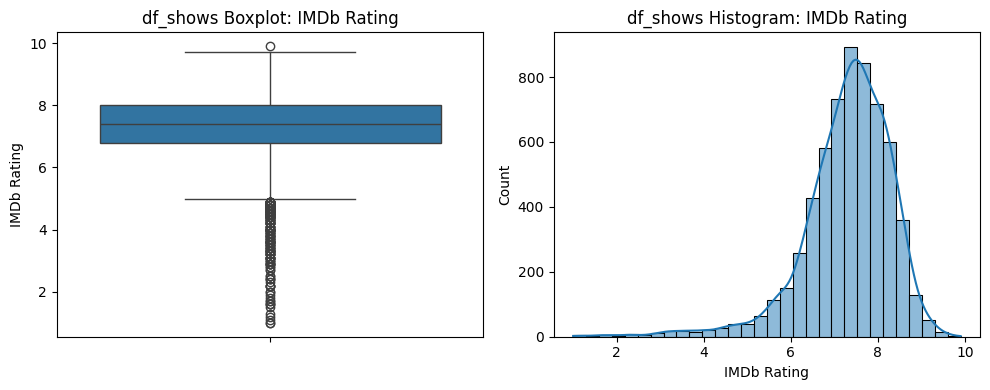


--- TV Shows Column: Total Ratings ---
Outliers (IQR method):
     Total Ratings
0          2400000
1          2300000
2          1400000
3          1100000
4          1100000
..             ...
788          33000
789          33000
790          33000
791          33000
792          33000

[793 rows x 1 columns]
Outliers (Z-score method):
    Total Ratings
0         2400000
1         2300000
2         1400000
3         1100000
4         1100000
..            ...
88         265000
89         265000
90         265000
91         264000
92         263000

[93 rows x 1 columns]


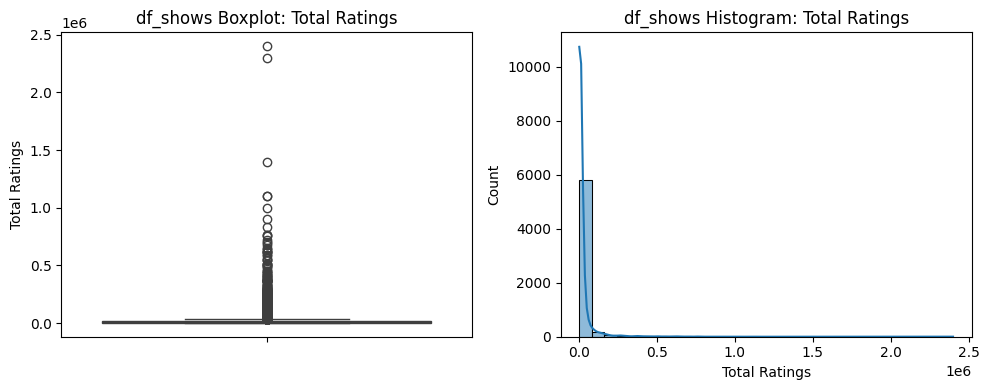


--- TV Shows Column: start_year ---
Outliers (IQR method):
      start_year
266         1975
277         1959
289         1966
341         1969
411         1972
...          ...
6114        1960
6127        1977
6129        1976
6137        1969
6145        1981

[340 rows x 1 columns]
Outliers (Z-score method):
      start_year
277         1959
289         1966
341         1969
615         1969
631         1960
...          ...
5993        1955
6000        1964
6059        1966
6114        1960
6137        1969

[136 rows x 1 columns]


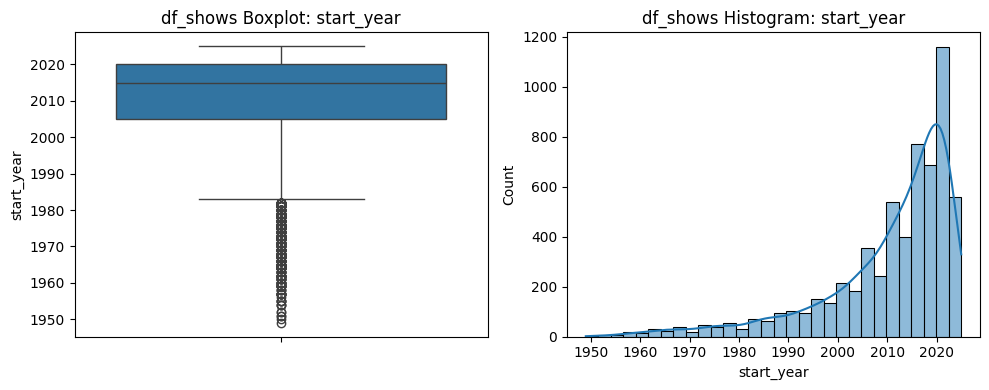


--- TV Shows Column: end_year ---
Outliers (IQR method):
      end_year
107       1991
266       1979
277       1964
289       1969
341       1974
...        ...
6114      1964
6127      1980
6129      1982
6137      1970
6145      1982

[421 rows x 1 columns]
Outliers (Z-score method):
      end_year
277       1964
289       1969
341       1974
631       1966
733       1975
...        ...
6000      1967
6059      1968
6061      1973
6114      1964
6137      1970

[146 rows x 1 columns]


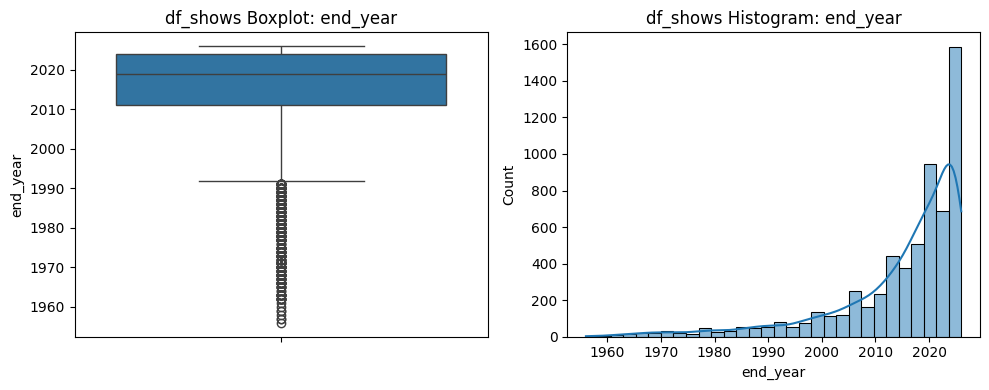


--- TV Shows Column: run_length ---
Outliers (IQR method):
      run_length
4             12
6             12
14            14
16            12
18            12
...          ...
6110          18
6112          15
6121          18
6130          13
6134          14

[533 rows x 1 columns]
Outliers (Z-score method):
      run_length
37            36
42            28
51            26
78            26
84            26
...          ...
6009          50
6011          24
6012          27
6014          38
6098          28

[134 rows x 1 columns]


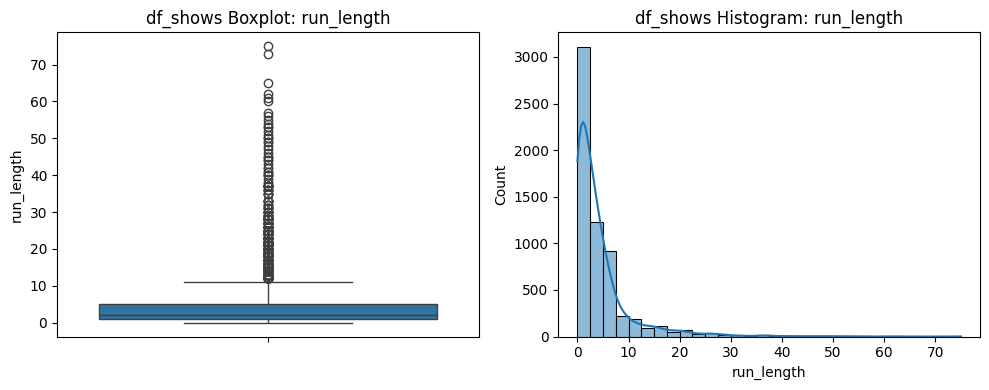

In [76]:
# TV Shows DataFrame Outlier Analysis

# Select numeric columns for df_shows
numeric_cols_shows = df_shows.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols_shows)

for col in numeric_cols_shows:
    print(f"\n--- TV Shows Column: {col} ---")
    
    # Detect outliers using IQR method
    outliers_iqr = detect_outliers_iqr(df_shows, col)
    print("Outliers (IQR method):")
    print(outliers_iqr[[col]])
    
    # Detect outliers using Z-score method
    outliers_z = detect_outliers_zscore(df_shows, col)
    print("Outliers (Z-score method):")
    print(outliers_z[[col]])
    
    # Visualize using Boxplot and Histogram
    plt.figure(figsize=(10, 4))
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_shows[col])
    plt.title(f"df_shows Boxplot: {col}")
    # Histogram with KDE
    plt.subplot(1, 2, 2)
    sns.histplot(df_shows[col], bins=30, kde=True)
    plt.title(f"df_shows Histogram: {col}")
    plt.tight_layout()
    plt.show()


['Rating', 'Total Ratings', 'Metascore', 'Has Metascore']

--- Movies Column: Rating ---
Outliers (IQR method):
      Rating
15       0.0
24       0.0
27       0.0
41       0.0
50       0.0
...      ...
5991     3.4
6018     0.0
6054     3.3
6115     3.3
6144     3.8

[245 rows x 1 columns]
Outliers (Z-score method):
      Rating
15       0.0
24       0.0
27       0.0
41       0.0
50       0.0
...      ...
5918     0.0
5949     0.0
5951     0.0
5971     0.0
6018     0.0

[164 rows x 1 columns]


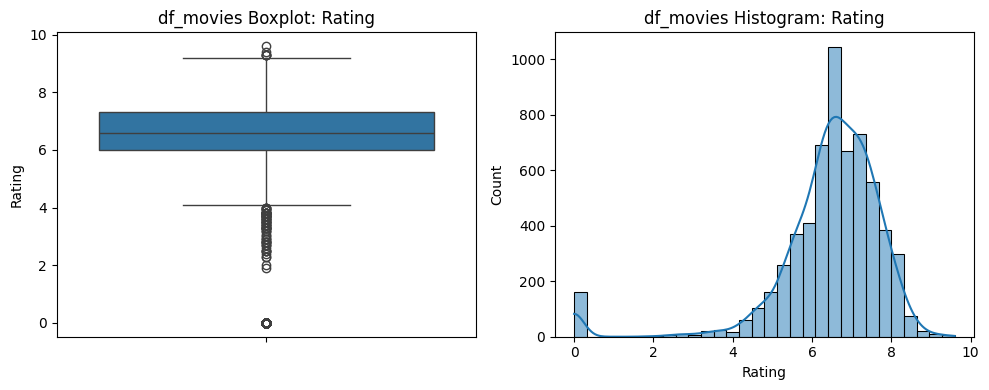


--- Movies Column: Total Ratings ---
Outliers (IQR method):
      Total Ratings
32        2300000.0
39         451000.0
52         607000.0
60         895000.0
63        3000000.0
...             ...
3147       420000.0
3288       428000.0
3378       393000.0
3486       498000.0
3722       491000.0

[522 rows x 1 columns]
Outliers (Z-score method):
      Total Ratings
32        2300000.0
60         895000.0
63        3000000.0
64        2100000.0
69        1700000.0
...             ...
1275       924000.0
1376       844000.0
1680       893000.0
1884       879000.0
1954       835000.0

[134 rows x 1 columns]


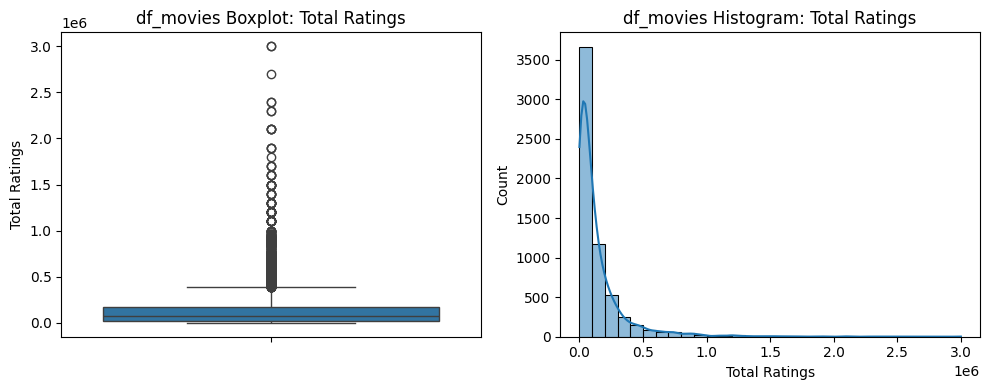


--- Movies Column: Metascore ---
Outliers (IQR method):
      Metascore
512          19
1075         18
1289         19
1399         16
1486         17
1864         18
1921         16
1925         19
1935         13
2006          5
2017         19
2083         19
2087         19
2374         14
2462          9
2521         12
2674         13
2777         12
2894         19
2924         18
3047         10
3055         19
3144         17
3315          9
3366         12
3426         15
3749         13
3757         17
3770          9
3870         18
3978         15
4152         17
4226         11
4391          9
4424         11
4520         16
4546         14
4612         19
4670         18
5061          1
5113          5
5220         18
5267         18
5324         14
5340         16
5383         19
5394         14
5396         19
5635         17
5686         18
5812          9
5841         11
5878         16
5991         12
6032         16
6077         16
Outliers (Z-score method):
    

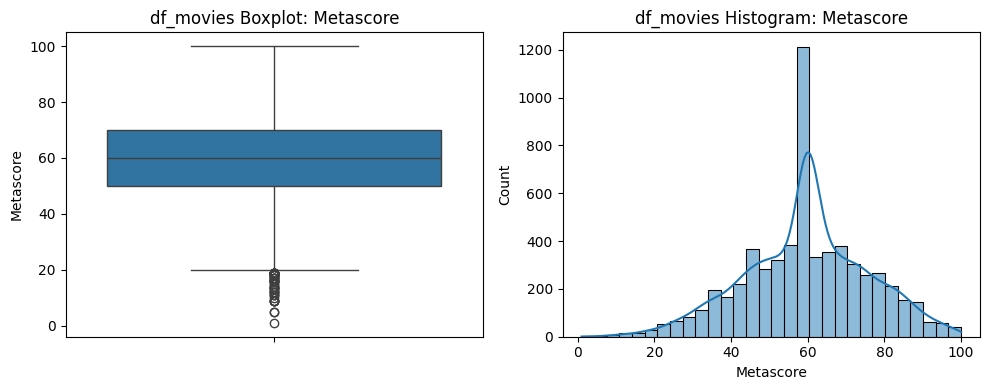


--- Movies Column: Has Metascore ---
Outliers (IQR method):
      Has Metascore
13                0
15                0
24                0
27                0
29                0
...             ...
6125              0
6128              0
6132              0
6136              0
6149              0

[910 rows x 1 columns]
Outliers (Z-score method):
Empty DataFrame
Columns: [Has Metascore]
Index: []


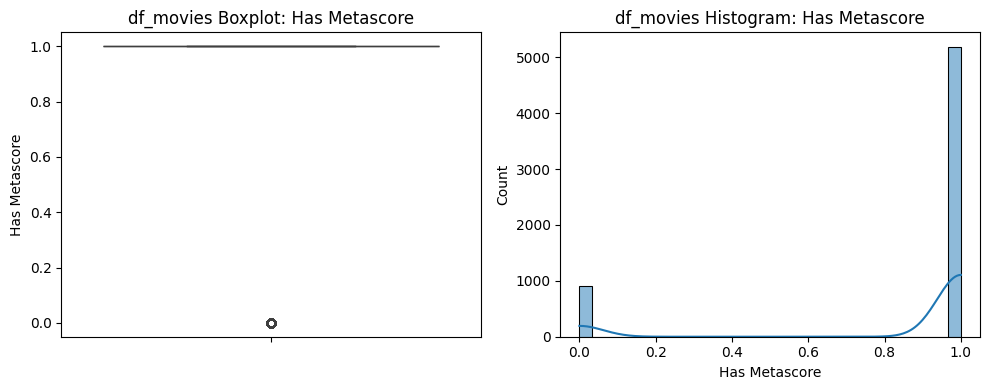

In [77]:
# Movies DataFrame Outlier Analysis

# Select numeric columns for df_movies
numeric_cols_movies = df_movies.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols_movies)

for col in numeric_cols_movies:
    print(f"\n--- Movies Column: {col} ---")
    
    # Detect outliers using IQR method
    outliers_iqr = detect_outliers_iqr(df_movies, col)
    print("Outliers (IQR method):")
    print(outliers_iqr[[col]])
    
    # Detect outliers using Z-score method
    outliers_z = detect_outliers_zscore(df_movies, col)
    print("Outliers (Z-score method):")
    print(outliers_z[[col]])
    
    # Visualize using Boxplot and Histogram
    plt.figure(figsize=(10, 4))
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_movies[col])
    plt.title(f"df_movies Boxplot: {col}")
    # Histogram with KDE
    plt.subplot(1, 2, 2)
    sns.histplot(df_movies[col], bins=30, kde=True)
    plt.title(f"df_movies Histogram: {col}")
    plt.tight_layout()
    plt.show()

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

Frequency Distribution for 'Parental Rating' in df_movies:
Parental Rating
R            2681
PG-13        1501
Not Rated     915
PG            828
G             133
NC-17          38
Name: count, dtype: int64


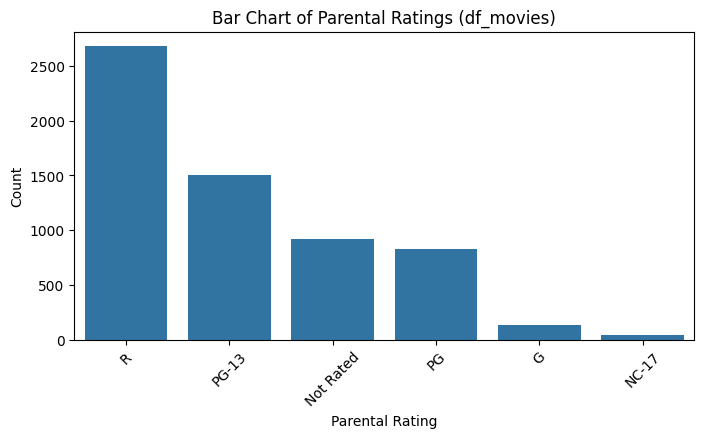

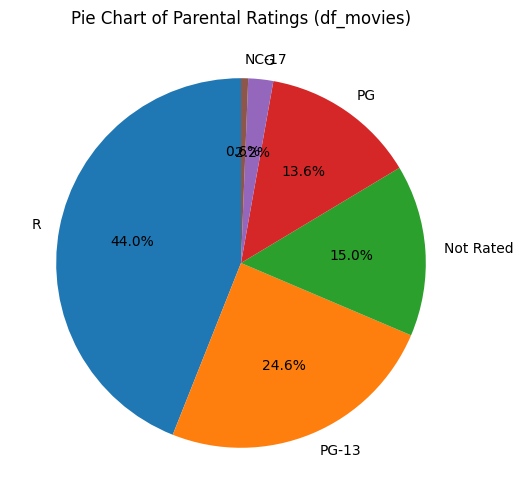

In [101]:
# For df_movies:
print("Frequency Distribution for 'Parental Rating' in df_movies:")
print(df_movies['Parental Rating'].value_counts())

# Bar Chart (Ordered)
plt.figure(figsize=(8, 4))
sns.countplot(x='Parental Rating', 
              data=df_movies, 
              order=df_movies['Parental Rating'].value_counts().index)
plt.title("Bar Chart of Parental Ratings (df_movies)")
plt.xlabel("Parental Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Pie Chart (Nominal)
plt.figure(figsize=(6, 6))
df_movies['Parental Rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Parental Ratings (df_movies)")
plt.ylabel('')
plt.show()


Frequency Distribution for 'Content Rating' in df_shows:
Content Rating
TV-14        1691
TV-MA        1598
Not Rated    1291
TV-PG         892
TV-Y7         251
TV-G          245
TV-Y          141
TV-Y7-FV       41
Name: count, dtype: int64


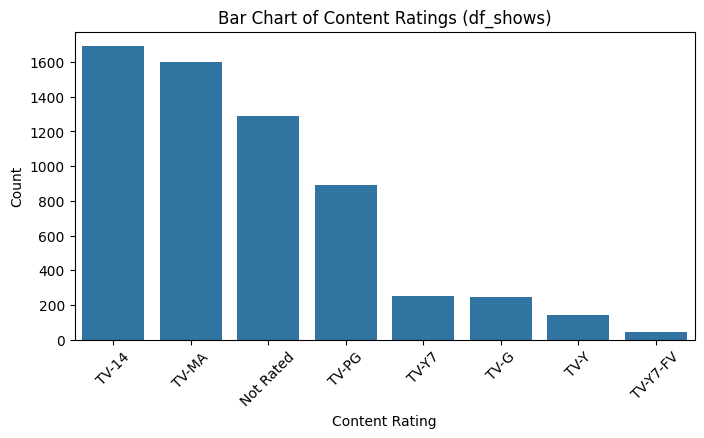

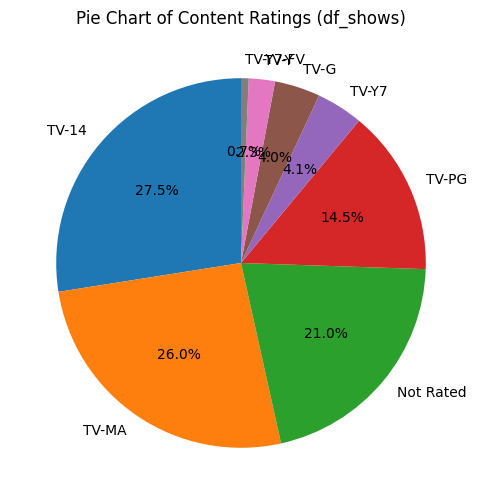

In [79]:
# For df_shows: 
if 'Content Rating' in df_shows.columns:
    print("Frequency Distribution for 'Content Rating' in df_shows:")
    print(df_shows['Content Rating'].value_counts())
    
    # Bar Chart
    plt.figure(figsize=(8, 4))
    sns.countplot(x='Content Rating', 
                  data=df_shows, 
                  order=df_shows['Content Rating'].value_counts().index)
    plt.title("Bar Chart of Content Ratings (df_shows)")
    plt.xlabel("Content Rating")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
    
    # Pie Chart
    plt.figure(figsize=(6, 6))
    df_shows['Content Rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title("Pie Chart of Content Ratings (df_shows)")
    plt.ylabel('')
    plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

['Rating', 'Total Ratings', 'Metascore', 'Has Metascore']


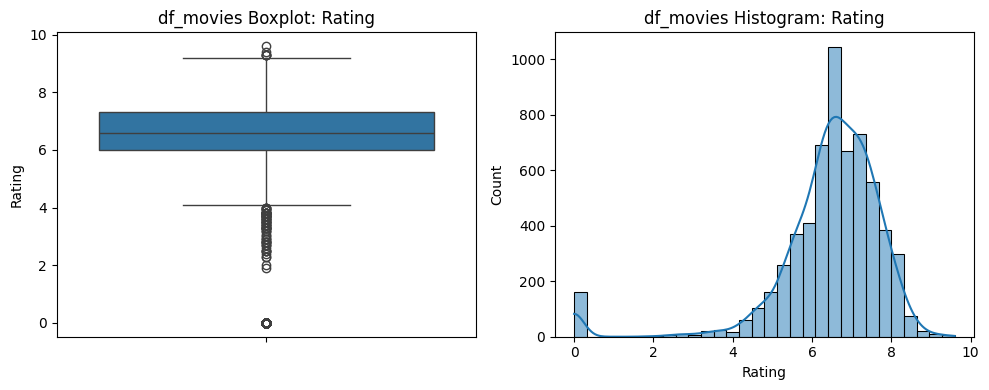

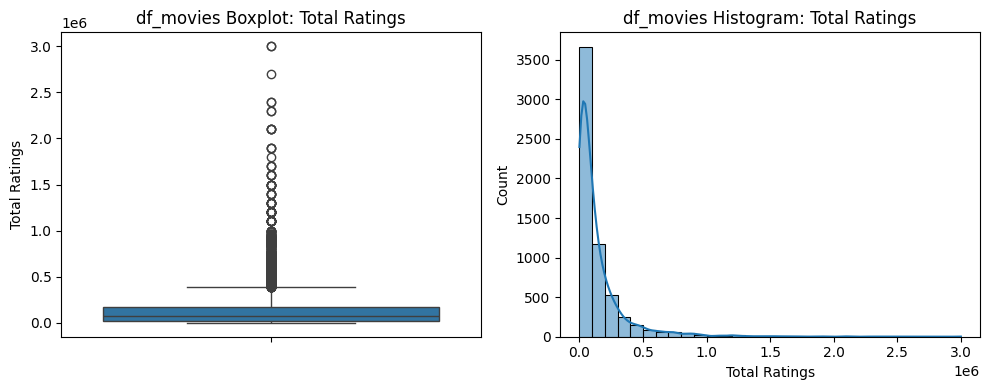

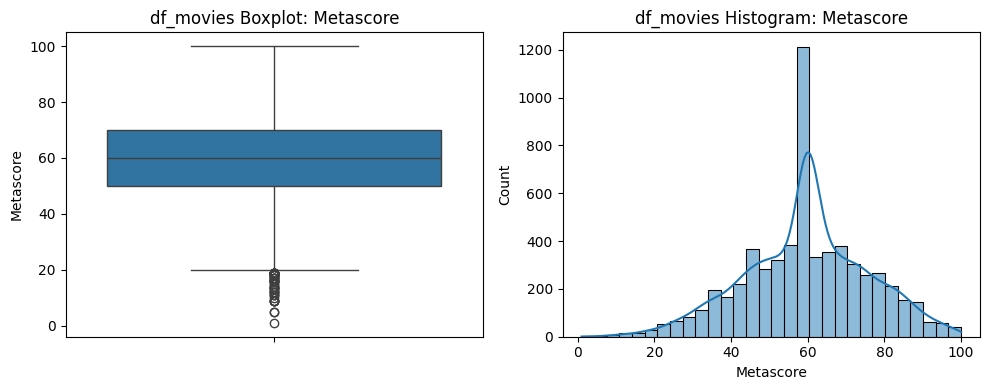

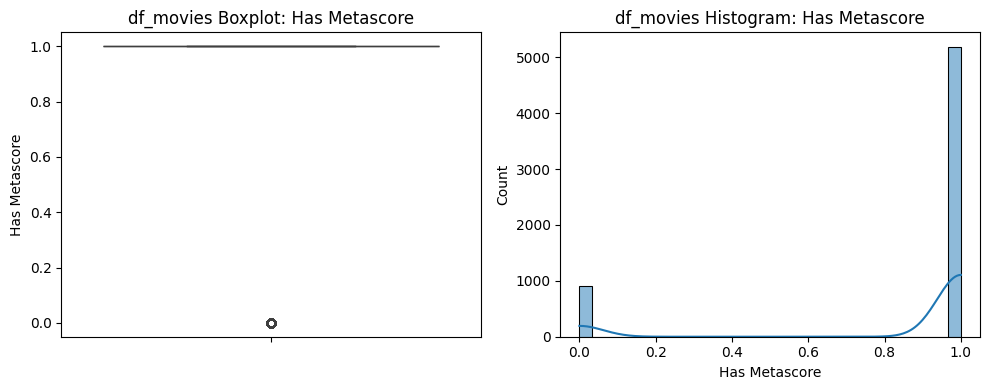

In [80]:
# Movies 
# numerical columns for df_movies
numeric_cols_movies = df_movies.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols_movies)

# Loop through each numeric column and create a boxplot and histogram
for col in numeric_cols_movies:
    plt.figure(figsize=(10, 4))
    
    # Boxplot 
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_movies[col])
    plt.title(f"df_movies Boxplot: {col}")
    
    # Histogram 
    plt.subplot(1, 2, 2)
    sns.histplot(df_movies[col], bins=30, kde=True)
    plt.title(f"df_movies Histogram: {col}")
    
    plt.tight_layout()
    plt.show()

['IMDb Rating', 'Total Ratings', 'start_year', 'end_year', 'run_length']


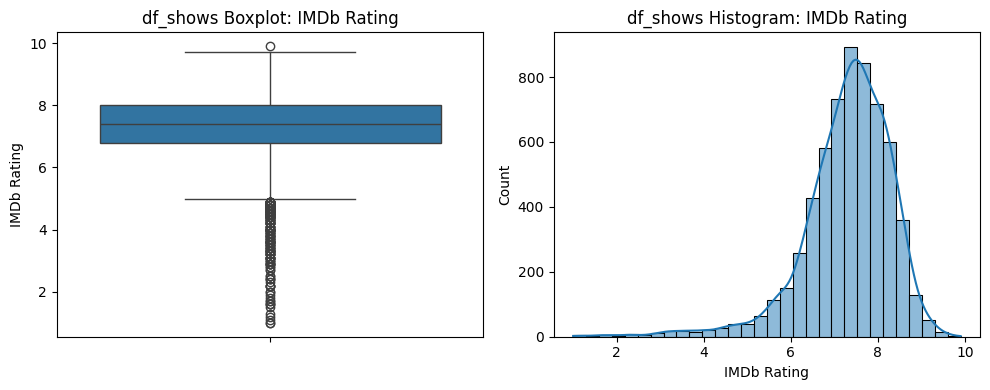

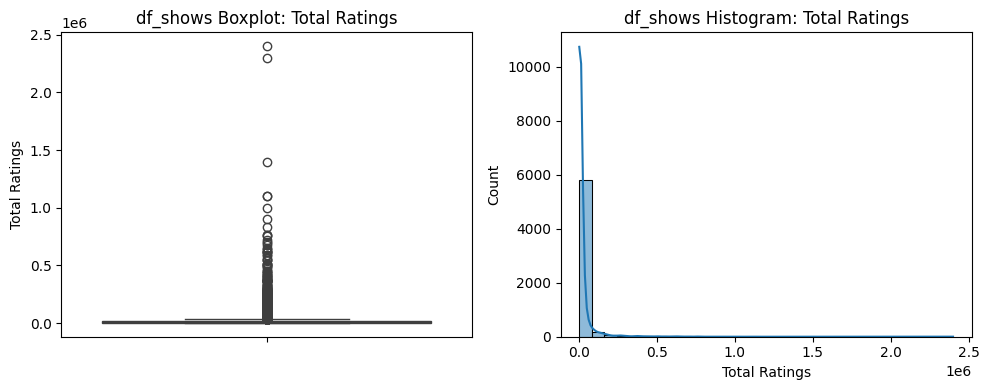

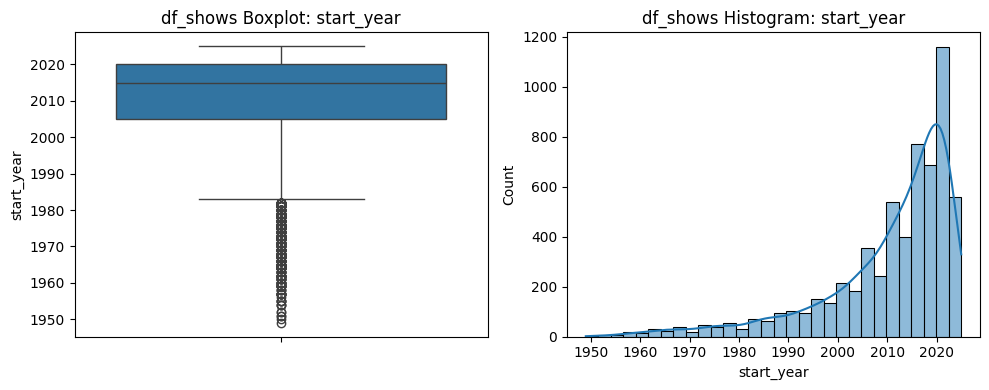

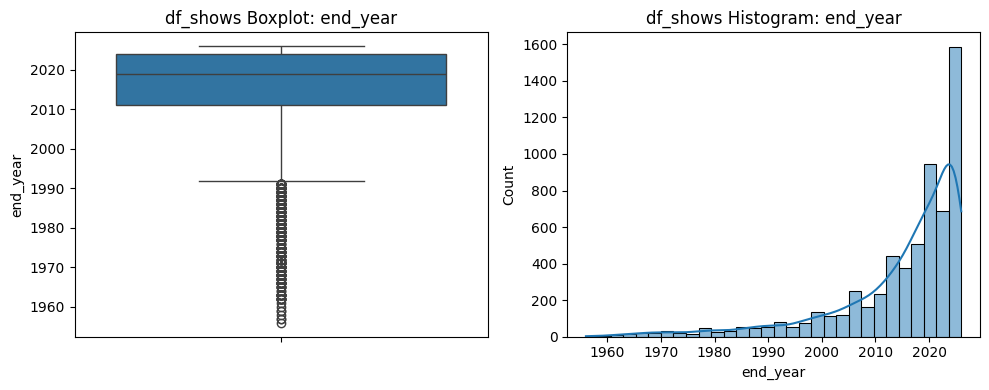

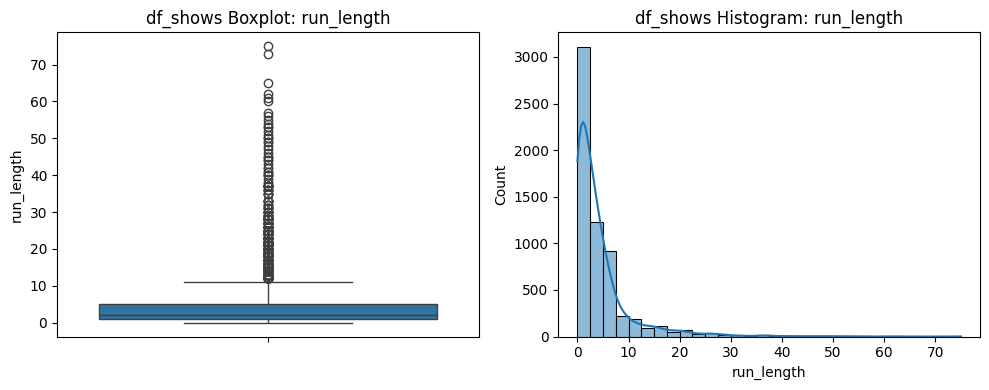

In [81]:
# Shows
# Get all numeric columns in df_shows
numeric_cols_shows = df_shows.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols_shows)

# Loop through each numeric column and create a boxplot and histogram
for col in numeric_cols_shows:
    plt.figure(figsize=(10, 4))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_shows[col])
    plt.title(f"df_shows Boxplot: {col}")
    
    # Histogram 
    plt.subplot(1, 2, 2)
    sns.histplot(df_shows[col], bins=30, kde=True)
    plt.title(f"df_shows Histogram: {col}")
    
    plt.tight_layout()
    plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [82]:
print(df_movies[numeric_cols_movies].describe())

            Rating  Total Ratings    Metascore  Has Metascore
count  6096.000000   6.096000e+03  6096.000000    6096.000000
mean      6.437648   1.428905e+05    59.695538       0.850722
std       1.435689   2.259806e+05    16.135343       0.356392
min       0.000000   0.000000e+00     1.000000       0.000000
25%       6.000000   2.200000e+04    50.000000       1.000000
50%       6.600000   7.000000e+04    60.000000       1.000000
75%       7.300000   1.680000e+05    70.000000       1.000000
max       9.600000   3.000000e+06   100.000000       1.000000


In [83]:
print(df_movies['Parental Rating'].value_counts())

Parental Rating
R            2681
PG-13        1501
Not Rated     915
PG            828
G             133
NC-17          38
Name: count, dtype: int64


In [84]:
print(df_shows.describe())

       IMDb Rating  Total Ratings   start_year     end_year   run_length
count  6150.000000   6.150000e+03  6150.000000  6150.000000  6150.000000
mean      7.302065   2.371265e+04  2010.420488  2014.755122     4.334634
std       1.036168   7.904530e+04    13.516730    12.430344     6.376251
min       1.000000   2.000000e+03  1949.000000  1956.000000     0.000000
25%       6.800000   3.300000e+03  2005.000000  2011.000000     1.000000
50%       7.400000   5.900000e+03  2015.000000  2019.000000     2.000000
75%       8.000000   1.500000e+04  2020.000000  2024.000000     5.000000
max       9.900000   2.400000e+06  2025.000000  2026.000000    75.000000


In [85]:
print(df_shows['Content Rating'].value_counts())

Content Rating
TV-14        1691
TV-MA        1598
Not Rated    1291
TV-PG         892
TV-Y7         251
TV-G          245
TV-Y          141
TV-Y7-FV       41
Name: count, dtype: int64


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

#### Movies

Correlation Matrix for Movies:
                 Rating  Total Ratings  Metascore
Rating         1.000000       0.357925   0.408056
Total Ratings  0.357925       1.000000   0.241041
Metascore      0.408056       0.241041   1.000000


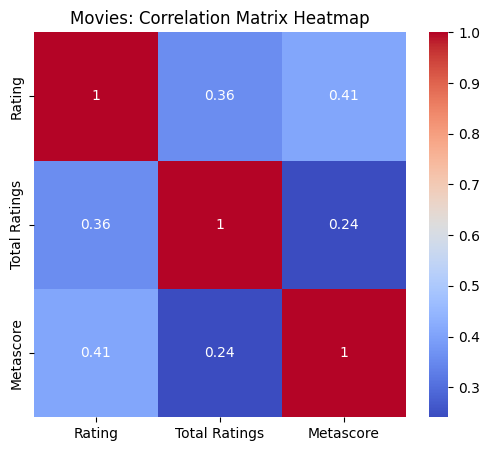

In [86]:
# Correlation Matrix and Heatmap for Numerical Variables 
numeric_cols_movies = ['Rating', 'Total Ratings', 'Metascore']
corr_movies = df_movies[numeric_cols_movies].corr()
print("Correlation Matrix for Movies:")
print(corr_movies)

plt.figure(figsize=(6, 5))
sns.heatmap(corr_movies, annot=True, cmap="coolwarm")
plt.title("Movies: Correlation Matrix Heatmap")
plt.show()


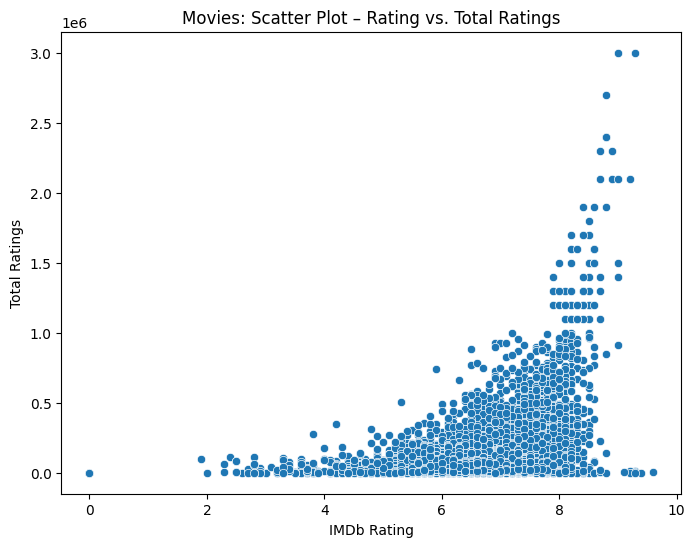

In [87]:
# Scatter Plot (Numerical vs. Numerical)
# IMDb Rating vs. Total Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Total Ratings', data=df_movies)
plt.title("Movies: Scatter Plot – Rating vs. Total Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Total Ratings")
plt.show()

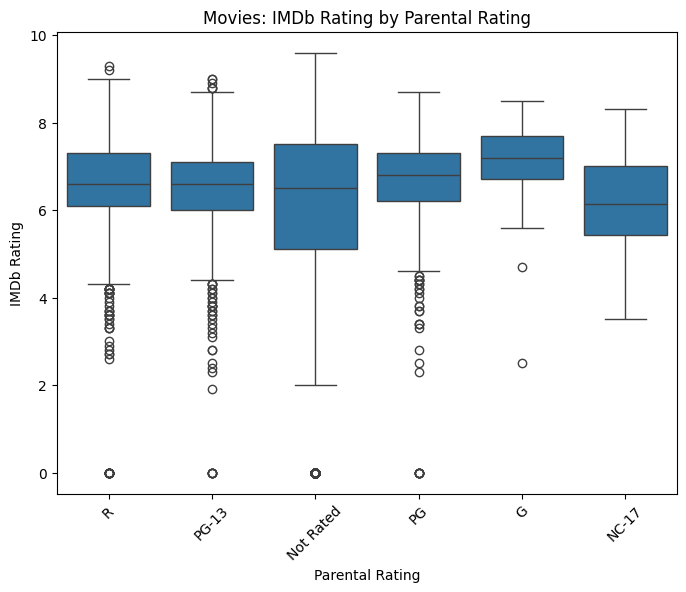

In [88]:
# Box Plot (Categorical vs. Numerical)
# Boxplot of IMDb Rating grouped by Parental Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parental Rating', y='Rating', data=df_movies, order=df_movies['Parental Rating'].value_counts().index)
plt.title("Movies: IMDb Rating by Parental Rating")
plt.xlabel("Parental Rating")
plt.ylabel("IMDb Rating")
plt.xticks(rotation=45)
plt.show()

#### Shows

Correlation Matrix for TV Shows:
               IMDb Rating  Total Ratings  run_length
IMDb Rating       1.000000       0.193411    0.009889
Total Ratings     0.193411       1.000000    0.074479
run_length        0.009889       0.074479    1.000000


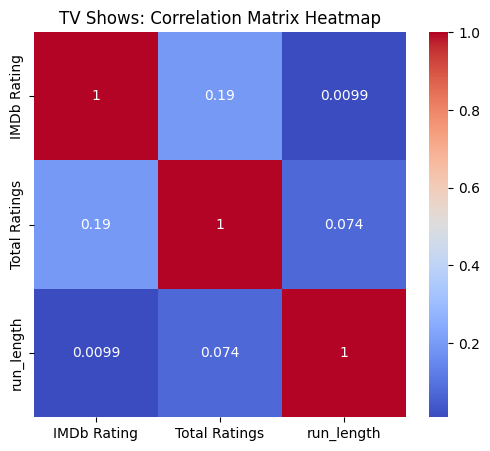

In [89]:
# Correlation Matrix and Heatmap for Numerical Variables
# 'IMDb Rating', 'Total Ratings', and 'run_length'
numeric_cols_shows = ['IMDb Rating', 'Total Ratings', 'run_length']
corr_shows = df_shows[numeric_cols_shows].corr()
print("Correlation Matrix for TV Shows:")
print(corr_shows)

plt.figure(figsize=(6, 5))
sns.heatmap(corr_shows, annot=True, cmap="coolwarm")
plt.title("TV Shows: Correlation Matrix Heatmap")
plt.show()

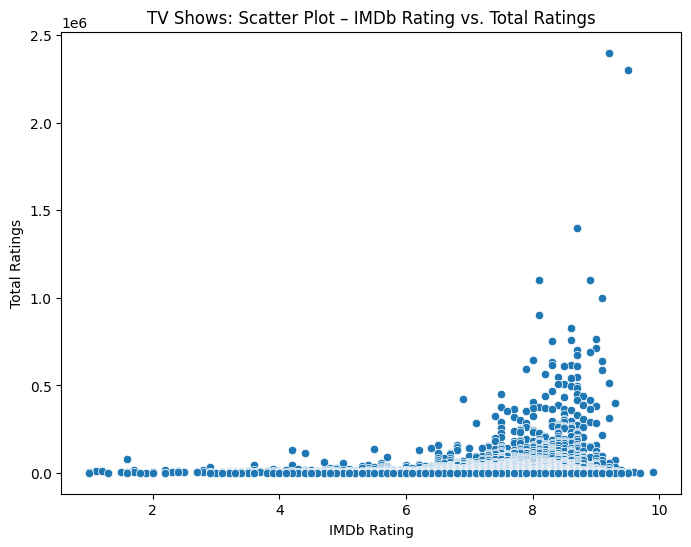

In [90]:
# Scatter Plot (Numerical vs. Numerical) 
# IMDb Rating vs. Total Ratings in TV shows
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IMDb Rating', y='Total Ratings', data=df_shows)
plt.title("TV Shows: Scatter Plot – IMDb Rating vs. Total Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Total Ratings")
plt.show()

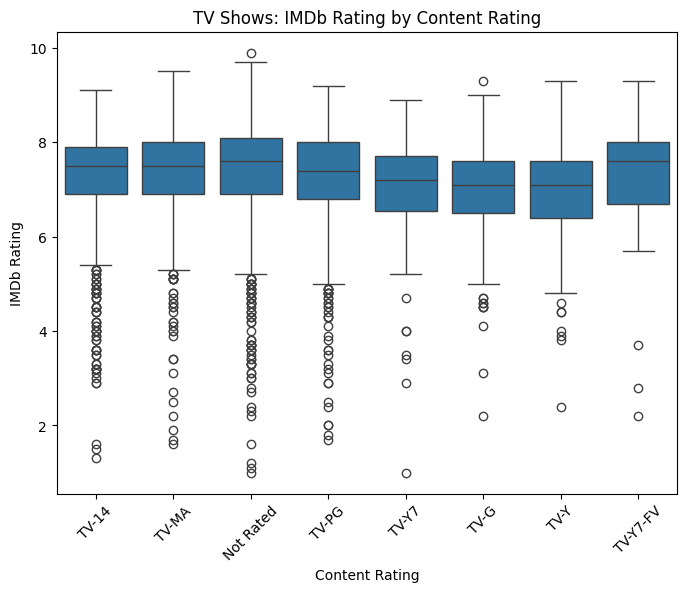

In [91]:
# Box Plot (Categorical vs. Numerical)
# Boxplot of IMDb Rating grouped by Content Rating
if 'Content Rating' in df_shows.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Content Rating', y='IMDb Rating', data=df_shows, 
                order=df_shows['Content Rating'].value_counts().index)
    plt.title("TV Shows: IMDb Rating by Content Rating")
    plt.xlabel("Content Rating")
    plt.ylabel("IMDb Rating")
    plt.xticks(rotation=45)
    plt.show()

<Figure size 800x600 with 0 Axes>

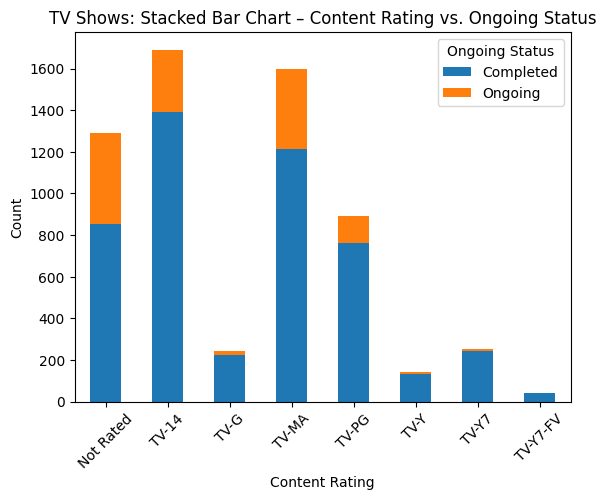

In [92]:
# Stacked Bar Chart (Categorical vs. Categorical) 
# Counts of TV shows by Content Rating and Ongoing status
# Convert the boolean 'ongoing' column to a string for plotting
df_shows['Ongoing Status'] = df_shows['ongoing'].map({True: 'Ongoing', False: 'Completed'})
plt.figure(figsize=(8, 6))
stacked_shows = df_shows.groupby(['Content Rating', 'Ongoing Status']).size().unstack(fill_value=0)
stacked_shows.plot(kind='bar', stacked=True)
plt.title("TV Shows: Stacked Bar Chart – Content Rating vs. Ongoing Status")
plt.xlabel("Content Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

# Our insights

#### Movies

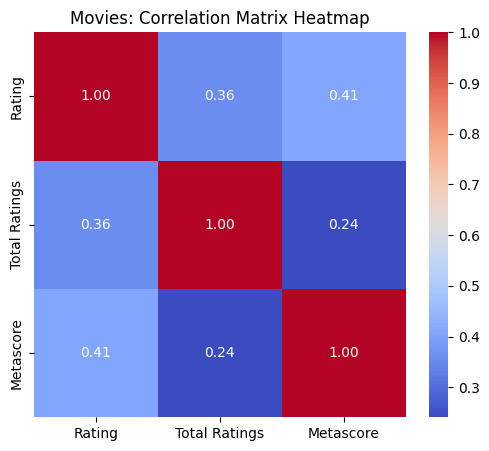

In [93]:
numeric_cols_movies = ['Rating', 'Total Ratings', 'Metascore']

corr_movies = df_movies[numeric_cols_movies].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_movies, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Movies: Correlation Matrix Heatmap")
plt.show()

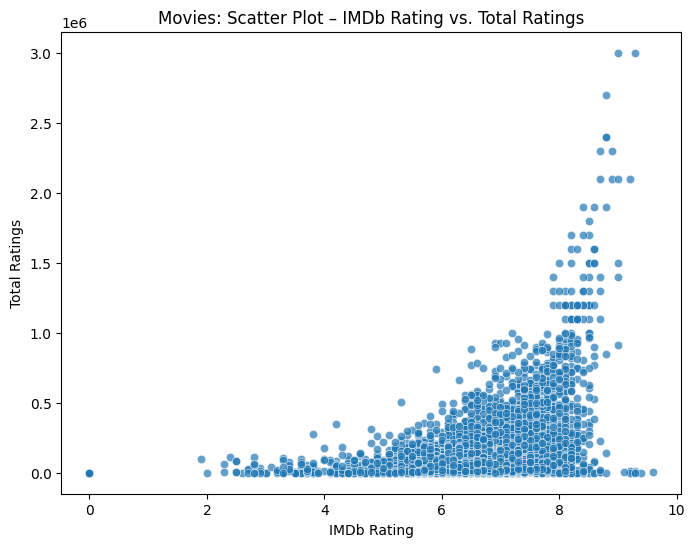

In [94]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Total Ratings', data=df_movies, alpha=0.7)
plt.title("Movies: Scatter Plot – IMDb Rating vs. Total Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Total Ratings")
plt.show()

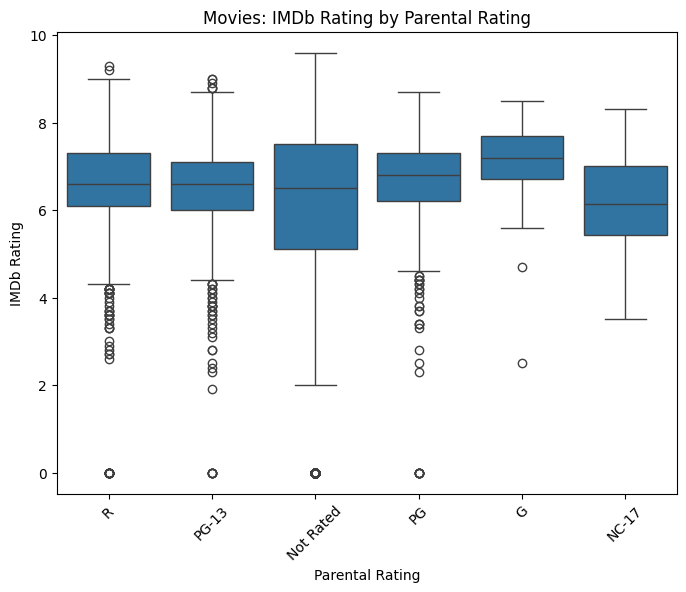

In [95]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parental Rating', y='Rating', data=df_movies, 
            order=df_movies['Parental Rating'].value_counts().index)
plt.title("Movies: IMDb Rating by Parental Rating")
plt.xlabel("Parental Rating")
plt.ylabel("IMDb Rating")
plt.xticks(rotation=45)
plt.show()

#### Shows

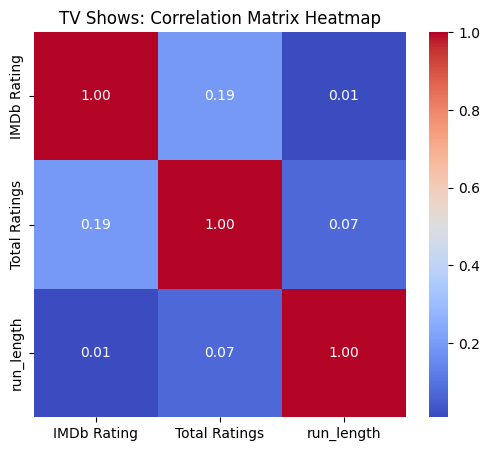

In [96]:
numeric_cols_shows = ['IMDb Rating', 'Total Ratings', 'run_length']

corr_shows = df_shows[numeric_cols_shows].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_shows, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("TV Shows: Correlation Matrix Heatmap")
plt.show()

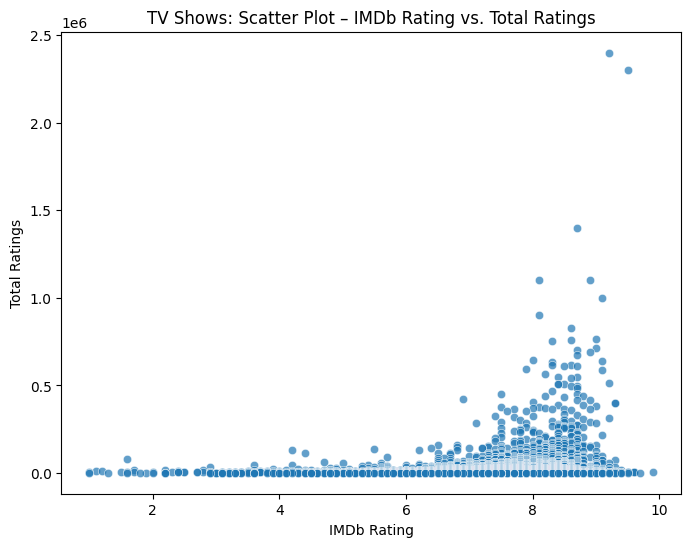

In [97]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IMDb Rating', y='Total Ratings', data=df_shows, alpha=0.7)
plt.title("TV Shows: Scatter Plot – IMDb Rating vs. Total Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Total Ratings")
plt.show()

<Figure size 800x600 with 0 Axes>

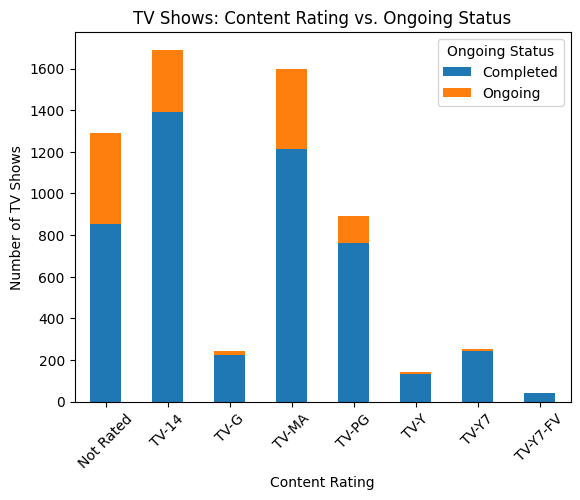

In [98]:
df_shows['Ongoing Status'] = df_shows['ongoing'].map({True: 'Ongoing', False: 'Completed'})

stacked_data = df_shows.groupby(['Content Rating', 'Ongoing Status']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
stacked_data.plot(kind='bar', stacked=True)
plt.title("TV Shows: Content Rating vs. Ongoing Status")
plt.xlabel("Content Rating")
plt.ylabel("Number of TV Shows")
plt.xticks(rotation=45)
plt.legend(title="Ongoing Status")
plt.show()

## ML Models

In [102]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics


### df_shows

In [103]:
df_shows.head()

,Rank,Series,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length,Ongoing Status
0,1,Game of Thrones,TV-MA,9.2,2400000,2011,2019,False,8,Completed
1,2,Breaking Bad,TV-MA,9.5,2300000,2008,2013,False,5,Completed
2,3,Stranger Things,TV-14,8.7,1400000,2016,2025,False,9,Completed
3,4,Friends,TV-14,8.9,1100000,1994,2004,False,10,Completed
4,5,The Walking Dead,TV-MA,8.1,1100000,2010,2022,False,12,Completed


In [192]:
df_shows['Content Rating'].value_counts()

Content Rating
TV-14        1691
TV-MA        1598
Not Rated    1291
TV-PG         892
TV-Y7         251
TV-G          245
TV-Y          141
TV-Y7-FV       41
Name: count, dtype: int64

In [293]:
df_shows_model = df_shows[['IMDb Rating', 'Total Ratings', 'Rank']]

In [294]:
# Prepare data
X = df_shows_model


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [295]:
X.shape

(6150, 3)

In [296]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

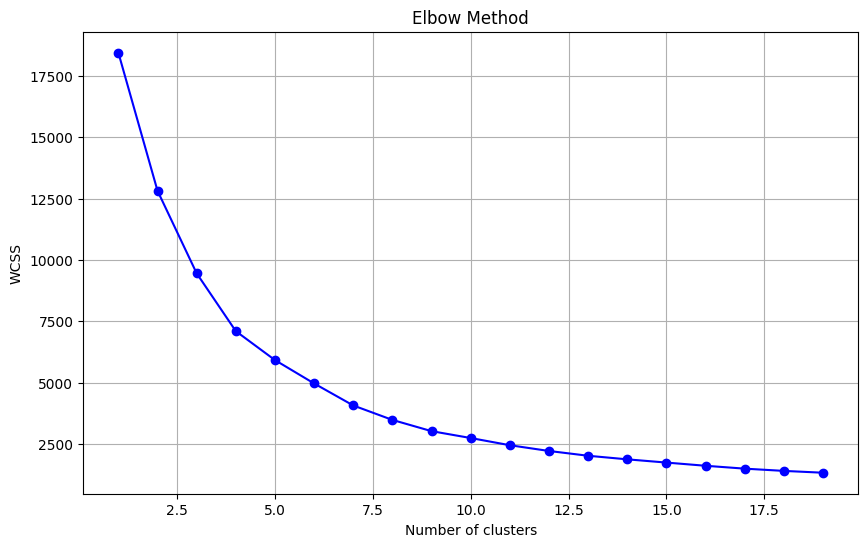

In [297]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [306]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
# model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
model = KMeans(
    n_clusters=optimal_clusters,
    init='k-means++',      # Keeps a smart initialization strategy.
    max_iter=500,          # Increased to allow more iterations if needed.
    n_init=50,             # More initializations can lead to a more stable solution.
    tol=1e-4,              # Convergence tolerance can be adjusted for finer precision.
    algorithm='elkan',     # 'elkan' can speed up convergence with Euclidean distances.
    random_state=0
)


In [307]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

In [308]:
X.head(2)

,IMDb Rating,Total Ratings,Rank
0,9.2,2400000,1
1,9.5,2300000,2


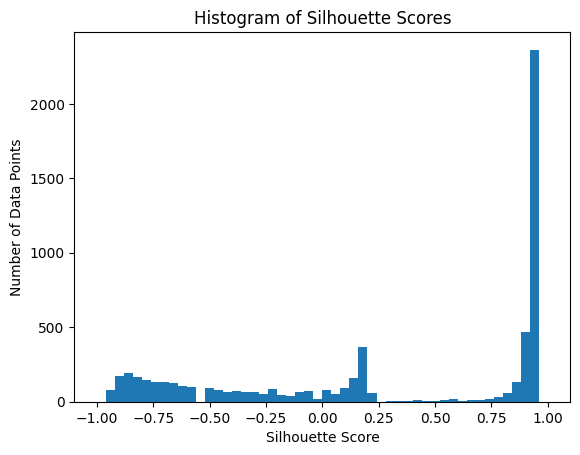

Silhouette average score: 0.2811619188080842


In [309]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [310]:
silhouette_scores

array([0.21177206, 0.22051767, 0.33919192, ..., 0.91683944, 0.91681487,
       0.91486743], shape=(6150,))

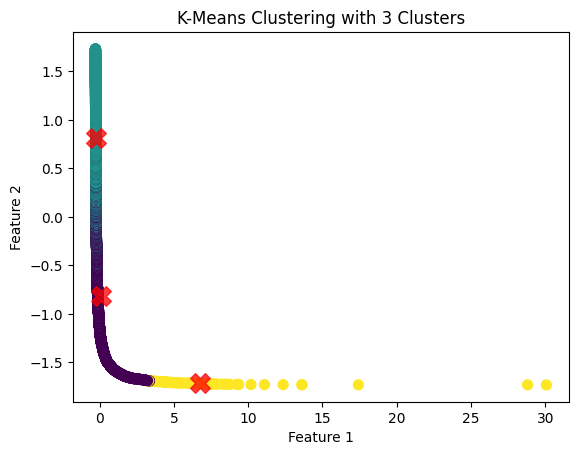

In [ ]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [312]:
X['kmeans'] = y_pred

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_24164/353328013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['kmeans'] = y_pred


<Axes: xlabel='IMDb Rating', ylabel='Total Ratings'>

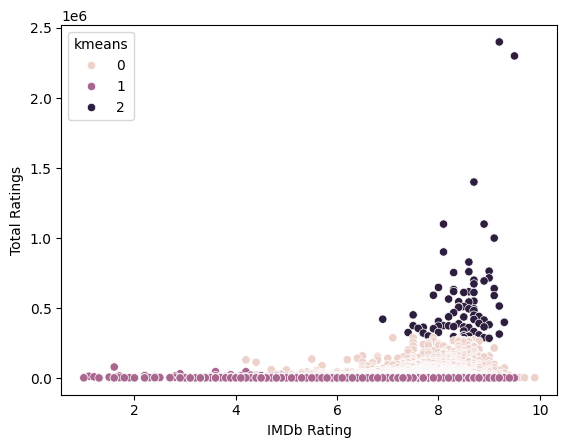

In [313]:
sns.scatterplot(data = X , x = 'IMDb Rating', y = 'Total Ratings', hue = 'kmeans')

In [317]:
df_shows.dtypes

Rank               object
Series             object
Content Rating     object
IMDb Rating       float64
Total Ratings       int64
start_year          int64
end_year            int64
ongoing              bool
run_length          int64
Ongoing Status     object
dtype: object

Rank               object
Series             object
Content Rating     object
IMDb Rating       float64
Total Ratings       int64
start_year          int64
end_year            int64
ongoing              bool
run_length          int64
Ongoing Status     object
dtype: object
For k = 2: WCSS = 10445.94, Silhouette Score = 0.5190
For k = 3: WCSS = 7550.40, Silhouette Score = 0.5196
For k = 4: WCSS = 6347.46, Silhouette Score = 0.3543
For k = 5: WCSS = 5338.95, Silhouette Score = 0.4616
For k = 6: WCSS = 4591.76, Silhouette Score = 0.5419
For k = 7: WCSS = 3936.12, Silhouette Score = 0.5480
For k = 8: WCSS = 3284.14, Silhouette Score = 0.5627
For k = 9: WCSS = 2872.14, Silhouette Score = 0.6069
For k = 10: WCSS = 2532.36, Silhouette Score = 0.6024


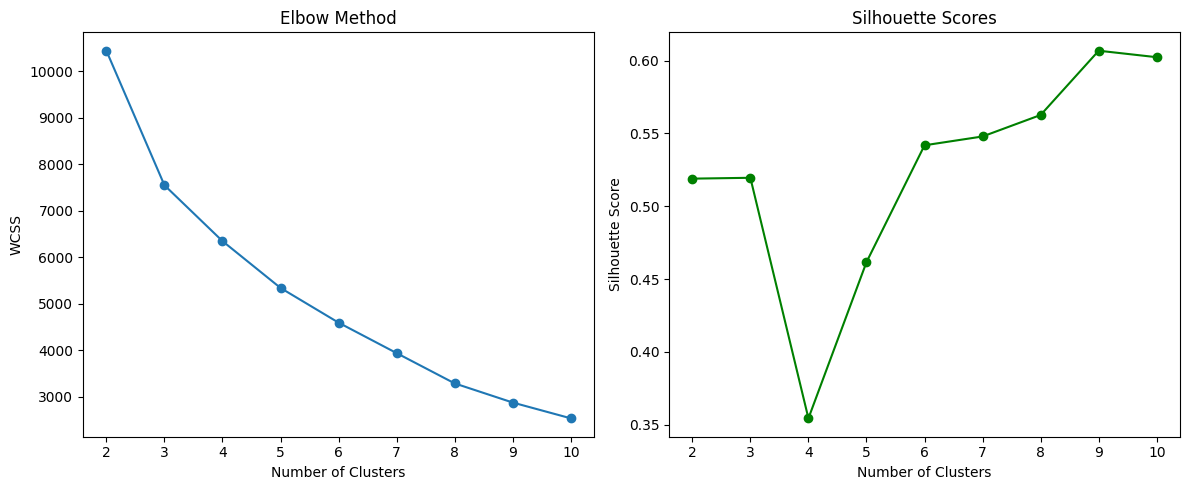

In [373]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assume your data is loaded in a DataFrame called df
# For example: df = pd.read_csv('your_data.csv')

# Display column information:
print(df_shows.dtypes)

# Drop columns not useful for clustering (e.g., 'Series' might be a unique identifier)
df_processed = df_shows.drop(columns=['Series'])

# Convert boolean column 'ongoing' to integer (0 and 1)
df_processed['ongoing'] = df_processed['ongoing'].astype(int)

# Define numerical and categorical columns based on your description
numerical_cols = ['run_length', 'ongoing']
categorical_cols = ['Content Rating']

# Create a preprocessor to scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline for preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the pipeline and transform the data
X_preprocessed = pipeline.fit_transform(df_processed)

# Determine the optimal number of clusters using the elbow method and silhouette score
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)  # silhouette score requires at least 2 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=20,
                    tol=1e-4, algorithm='elkan', random_state=0)
    cluster_labels = kmeans.fit_predict(X_preprocessed)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X_preprocessed, cluster_labels)
    silhouette_scores.append(score)
    print(f'For k = {k}: WCSS = {kmeans.inertia_:.2f}, Silhouette Score = {score:.4f}')

# Plot the elbow method and silhouette scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(cluster_range), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(list(cluster_range), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Based on your analysis, choose the optimal number of clusters.
# For this example, let's assume optimal_clusters = 3
optimal_clusters = 3

# Fit the final KMeans model with the chosen number of clusters
final_model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=500, n_init=20,
                     tol=1e-4, algorithm='elkan', random_state=0)
final_labels = final_model.fit_predict(X_preprocessed)

# Append the cluster labels to the original DataFrame
df_processed['Cluster'] = final_labels

# # Display the first few rows with cluster labels
# print(df_processed.head())


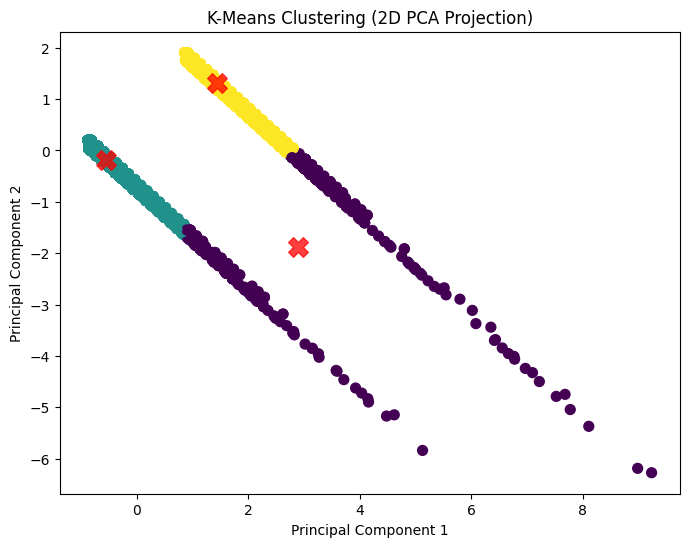

In [370]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Apply PCA to reduce the preprocessed data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# 2. Project the cluster centers into the same PCA space
centers_pca = pca.transform(final_model.cluster_centers_)

# 3. Plot the data points in the PCA-transformed space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='viridis', s=50)

# 4. Plot the projected cluster centers
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('K-Means Clustering (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


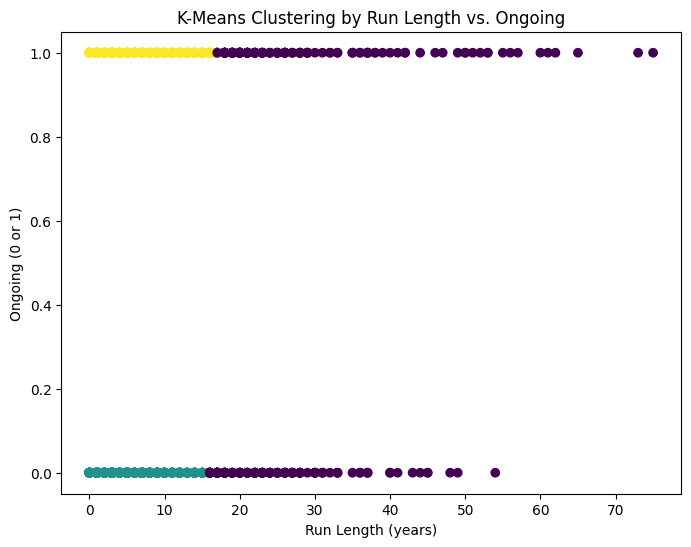

In [369]:
plt.figure(figsize=(8, 6))
plt.scatter(df_processed['run_length'], df_processed['ongoing'], c=final_labels, cmap='viridis')
plt.xlabel('Run Length (years)')
plt.ylabel('Ongoing (0 or 1)')
plt.title('K-Means Clustering by Run Length vs. Ongoing')
plt.show()


In [ ]:
# numerical_cols = ['IMDb Rating', 'Total Ratings','run_length', 'ongoing']
# categorical_cols = ['Rank', 'Content Rating']
# For k = 3: WCSS = 25330.32, Silhouette Score = 0.3250
# ---------------------------------------------------------------------------
# numerical_cols = ['run_length', 'ongoing']
# categorical_cols = ['Content Rating']
# For k = 3: WCSS = 7550.40, Silhouette Score = 0.5196

In [361]:
df_processed[df_processed['Cluster'] == 0]

,Rank,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length,Ongoing Status,Cluster
37,38,TV-14,8.7,450000,1989,2025,1,36,Ongoing,0
42,43,TV-MA,8.7,419000,1997,2025,1,28,Ongoing,0
51,52,TV-MA,8.1,375000,1999,2025,1,26,Ongoing,0
59,60,TV-14,7.6,356000,2005,2025,1,20,Ongoing,0
62,63,TV-14,8.7,333000,2003,2019,0,16,Completed,0
...,...,...,...,...,...,...,...,...,...,...
6024,6025,Not Rated,6.0,2100,2003,2021,0,18,Completed,0
6050,6051,Not Rated,8.0,2100,2008,2024,0,16,Completed,0
6098,6099,Not Rated,7.0,2100,1997,2025,1,28,Ongoing,0
6110,6111,TV-PG,5.6,2100,2007,2025,1,18,Ongoing,0


### df_movies

In [330]:
df_movies.dtypes

Rank                object
Movie               object
Year                object
Duration            object
Parental Rating     object
Rating             float64
Total Ratings      float64
Metascore            int64
Has Metascore        int64
dtype: object

Rank               object
Series             object
Content Rating     object
IMDb Rating       float64
Total Ratings       int64
start_year          int64
end_year            int64
ongoing              bool
run_length          int64
Ongoing Status     object
dtype: object
For k = 2: WCSS = 17932.33, Silhouette Score = 0.5106
For k = 3: WCSS = 14386.78, Silhouette Score = 0.5278
For k = 4: WCSS = 11531.74, Silhouette Score = 0.5305
For k = 5: WCSS = 9205.36, Silhouette Score = 0.3945
For k = 6: WCSS = 7923.51, Silhouette Score = 0.3732
For k = 7: WCSS = 6795.29, Silhouette Score = 0.3790
For k = 8: WCSS = 6178.41, Silhouette Score = 0.3865
For k = 9: WCSS = 5596.73, Silhouette Score = 0.3968
For k = 10: WCSS = 5016.60, Silhouette Score = 0.4033


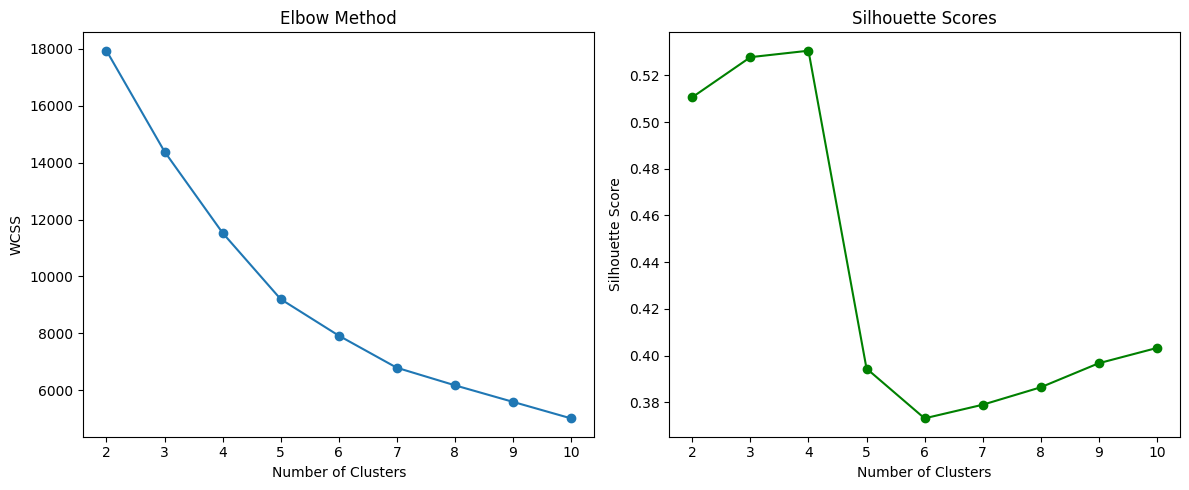

In [421]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assume your data is loaded in a DataFrame called df
# For example: df = pd.read_csv('your_data.csv')

# Display column information:
print(df_shows.dtypes)

# Drop columns not useful for clustering (e.g., 'Series' might be a unique identifier)
df_processed = df_shows.drop(columns=['Series'])

# Convert boolean column 'ongoing' to integer (0 and 1)
df_processed['ongoing'] = df_processed['ongoing'].astype(int)

# Define numerical and categorical columns based on your description
# Best Feature Combination:
# Features: ['Total Ratings', 'ongoing', 'run_length']
# Silhouette Score: 0.6908270602792892
# Features: ['IMDb Rating', 'Total Ratings', 'ongoing', 'run_length'] | Silhouette Score: 0.5278
# numeric_cols = ['Total Ratings', 'start_year', 'ongoing', 'run_length']
numerical_cols = ['IMDb Rating', 'Total Ratings', 'run_length', 'ongoing']
# categorical_cols = ['Content Rating']

# Create a preprocessor to scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        # ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline for preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the pipeline and transform the data
X_preprocessed = pipeline.fit_transform(df_processed)

# Determine the optimal number of clusters using the elbow method and silhouette score
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)  # silhouette score requires at least 2 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=20,
                    tol=1e-4, algorithm='elkan', random_state=0)
    cluster_labels = kmeans.fit_predict(X_preprocessed)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X_preprocessed, cluster_labels)
    silhouette_scores.append(score)
    print(f'For k = {k}: WCSS = {kmeans.inertia_:.2f}, Silhouette Score = {score:.4f}')

# Plot the elbow method and silhouette scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(cluster_range), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(list(cluster_range), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Based on your analysis, choose the optimal number of clusters.
# For this example, let's assume optimal_clusters = 3
optimal_clusters = 3

# Fit the final KMeans model with the chosen number of clusters
final_model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=500, n_init=20,
                     tol=1e-4, algorithm='elkan', random_state=0)
final_labels = final_model.fit_predict(X_preprocessed)

# Append the cluster labels to the original DataFrame
df_processed['Cluster'] = final_labels

# # Display the first few rows with cluster labels
# print(df_processed.head())


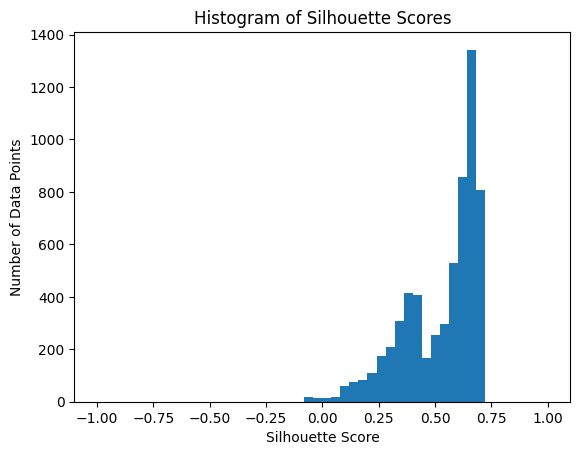

Silhouette average score: 0.5277670818636709


In [422]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X_preprocessed, final_labels)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X_preprocessed, final_labels)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

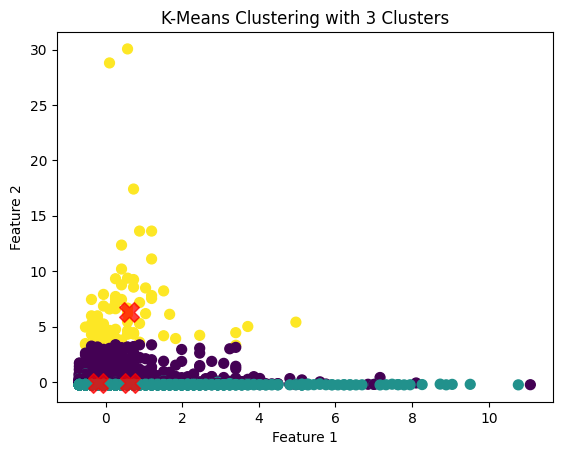

In [442]:
# Plotting the clusters with optimal number
plt.scatter(X_preprocessed[:, 2], X_preprocessed[:, 1], c=y_pred, s=50, cmap='viridis')

centers = final_model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

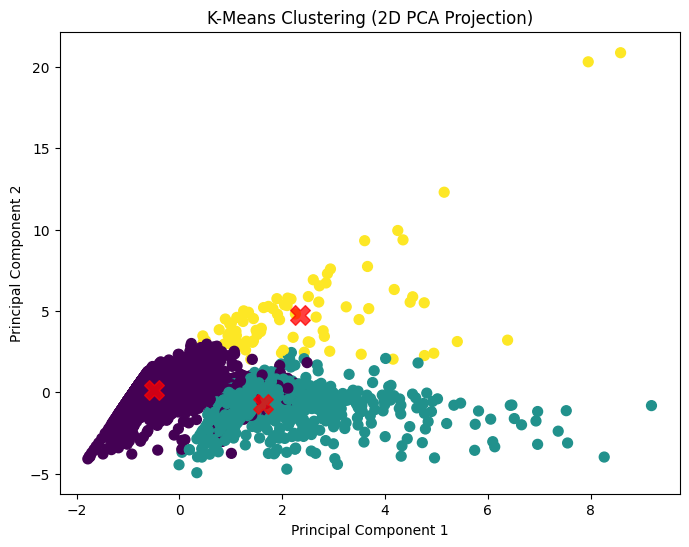

In [423]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Apply PCA to reduce the preprocessed data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# 2. Project the cluster centers into the same PCA space
centers_pca = pca.transform(final_model.cluster_centers_)

# 3. Plot the data points in the PCA-transformed space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='viridis', s=50)

# 4. Plot the projected cluster centers
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('K-Means Clustering (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [424]:
# Assume df_processed already has the 'Cluster' column assigned.
# Numeric summary for 'Total Ratings' and 'run_length'
numeric_summary = df_processed.groupby('Cluster').agg({
    'Total Ratings': ['mean', 'median', 'min', 'max'],
    'run_length': ['mean', 'median', 'min', 'max']
})
print("Numeric Summary (Total Ratings & run_length) by Cluster:")
print(numeric_summary)

# For the binary 'ongoing' feature, get the proportion of ongoing shows in each cluster.
ongoing_summary = df_processed.groupby('Cluster')['ongoing'].mean()
print("\nProportion of Ongoing Shows by Cluster:")
print(ongoing_summary)

# For the categorical 'Content Rating', show the minimum and maximum values for each cluster.
content_rating_summary = df_processed.groupby('Cluster')['Content Rating'].agg(['min', 'max'])
print("\nContent Rating (Min and Max) by Cluster:")
print(content_rating_summary)


Numeric Summary (Total Ratings & run_length) by Cluster:
         Total Ratings                            run_length               
                  mean    median     min      max       mean median min max
Cluster                                                                    
0         16606.958167    5900.0    2000   265000   3.157873    2.0   0  28
1         16440.658499    5300.0    2100   273000   8.358346    4.0   0  75
2        521402.298851  415000.0  255000  2400000   8.275862    7.0   1  36

Proportion of Ongoing Shows by Cluster:
Cluster
0    0.000000
1    0.977029
2    0.218391
Name: ongoing, dtype: float64

Content Rating (Min and Max) by Cluster:
               min       max
Cluster                     
0        Not Rated  TV-Y7-FV
1        Not Rated     TV-Y7
2        Not Rated  TV-Y7-FV


In [425]:
df_processed['Cluster'].value_counts()

Cluster
0    4757
1    1306
2      87
Name: count, dtype: int64

In [426]:
def rename_clusters(cluster_id):
    cluster_mapping = {
        1: "Running",
        0: "Concluded",
        2: "Blockbuster"
    }
    # Return the mapped label or 'unknown' if not found
    return cluster_mapping.get(cluster_id, "unknown")

# Example usage on a DataFrame 'df' with a column 'Cluster':
df_processed["Cluster"] = df_processed["Cluster"].apply(rename_clusters)
df_processed['Cluster'].value_counts()

Cluster
Concluded      4757
Running        1306
Blockbuster      87
Name: count, dtype: int64

In [433]:
df_processed

,Rank,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length,Ongoing Status,Cluster
0,1,TV-MA,9.2,2400000,2011,2019,0,8,Completed,Blockbuster
1,2,TV-MA,9.5,2300000,2008,2013,0,5,Completed,Blockbuster
2,3,TV-14,8.7,1400000,2016,2025,0,9,Completed,Blockbuster
3,4,TV-14,8.9,1100000,1994,2004,0,10,Completed,Blockbuster
4,5,TV-MA,8.1,1100000,2010,2022,0,12,Completed,Blockbuster
...,...,...,...,...,...,...,...,...,...,...
6145,6146,TV-Y7,6.8,2100,1981,1982,0,1,Completed,Concluded
6146,6147,TV-PG,7.3,2100,2004,2005,0,1,Completed,Concluded
6147,6148,Not Rated,3.1,2100,2007,2008,0,1,Completed,Concluded
6148,6149,Not Rated,6.3,2100,2020,2021,0,1,Completed,Concluded


In [434]:
df_blockbuster = df_processed[df_processed['Cluster'] == 'Blockbuster']
df_blockbuster

,Rank,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length,Ongoing Status,Cluster
0,1,TV-MA,9.2,2400000,2011,2019,0,8,Completed,Blockbuster
1,2,TV-MA,9.5,2300000,2008,2013,0,5,Completed,Blockbuster
2,3,TV-14,8.7,1400000,2016,2025,0,9,Completed,Blockbuster
3,4,TV-14,8.9,1100000,1994,2004,0,10,Completed,Blockbuster
4,5,TV-MA,8.1,1100000,2010,2022,0,12,Completed,Blockbuster
...,...,...,...,...,...,...,...,...,...,...
83,84,TV-MA,8.4,270000,2017,2025,0,8,Completed,Blockbuster
85,86,TV-MA,8.6,268000,2016,2023,0,7,Completed,Blockbuster
90,91,TV-MA,8.6,265000,2018,2024,0,6,Completed,Blockbuster
93,94,TV-14,8.6,260000,1993,2018,0,25,Completed,Blockbuster


In [ ]:
df_running = df_processed[df_processed['Cluster'] == 'Running']
df_running

,Rank,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length,Ongoing Status,Cluster
81,82,TV-MA,8.7,273000,2022,2025,1,3,Ongoing,Running
84,85,TV-14,8.5,270000,1999,2025,1,26,Ongoing,Running
86,87,TV-MA,8.3,267000,2019,2025,1,6,Ongoing,Running
89,90,TV-MA,8.5,265000,2022,2025,1,3,Ongoing,Running
91,92,TV-MA,8.8,264000,2005,2025,1,20,Ongoing,Running
...,...,...,...,...,...,...,...,...,...,...
6123,6124,Not Rated,7.3,2100,2023,2025,1,2,Ongoing,Running
6134,6135,TV-PG,4.1,2100,2011,2025,1,14,Ongoing,Running
6138,6139,TV-G,7.2,2100,2020,2025,1,5,Ongoing,Running
6139,6140,TV-MA,5.8,2100,2023,2025,1,2,Ongoing,Running


In [439]:
df_concluded = df_processed[df_processed['Cluster'] == 'Concluded']
df_concluded

,Rank,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length,Ongoing Status,Cluster
87,88,TV-MA,7.9,265000,2008,2014,0,6,Completed,Concluded
88,89,TV-MA,8.5,265000,2010,2013,0,3,Completed,Concluded
92,93,TV-14,8.4,263000,2008,2013,0,5,Completed,Concluded
94,95,TV-14,7.5,256000,2006,2010,0,4,Completed,Concluded
96,97,TV-14,7.8,254000,2011,2018,0,7,Completed,Concluded
...,...,...,...,...,...,...,...,...,...,...
6145,6146,TV-Y7,6.8,2100,1981,1982,0,1,Completed,Concluded
6146,6147,TV-PG,7.3,2100,2004,2005,0,1,Completed,Concluded
6147,6148,Not Rated,3.1,2100,2007,2008,0,1,Completed,Concluded
6148,6149,Not Rated,6.3,2100,2020,2021,0,1,Completed,Concluded


### DBsacn

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # 1. Load or prepare your data in df_shows
# #    For example:
# # df_shows = pd.read_csv('your_data.csv')

# # 2. Drop irrelevant columns
# df_processed = df_shows.drop(columns=['Series'], errors='ignore')  # 'errors=ignore' incase 'Series' doesn't exist

# # 3. Convert boolean column to int if needed
# df_processed['ongoing'] = df_processed['ongoing'].astype(int)

# # 4. Identify numeric (and optional categorical) columns
# numerical_cols = ['IMDb Rating', 'Total Ratings', 'run_length', 'ongoing']
# # categorical_cols = ['Content Rating']  # If you have any to one-hot encode

# # 5. Preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_cols),
#         # ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
#     ]
# )

# pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# X_preprocessed = pipeline.fit_transform(df_processed)

# # -------------------------------------------------------------------
# # Hyperparameter tuning for DBSCAN
# # -------------------------------------------------------------------
# eps_values = [0.3, 0.5, 1.0, 1.5, 2.0]    # Example values
# min_samples_values = [3, 5, 10, 15]      # Example values

# best_score = -1
# best_params = None

# results = []  # To store (eps, min_samples, n_clusters, silhouette_score)

# for eps in eps_values:
#     for min_samples in min_samples_values:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = dbscan.fit_predict(X_preprocessed)

#         # Count how many clusters (excluding outliers labeled as -1)
#         unique_labels = set(labels) - {-1}
#         n_clusters = len(unique_labels)

#         # Only compute silhouette if we have at least 2 clusters
#         if n_clusters > 1:
#             score = silhouette_score(X_preprocessed, labels)
#         else:
#             score = -1  # Indicate an invalid or not-meaningful scenario

#         results.append((eps, min_samples, n_clusters, score))

#         # Update the best score if this is the highest so far
#         if score > best_score:
#             best_score = score
#             best_params = (eps, min_samples)

# # Print a summary of the best result
# if best_params is not None:
#     print(f"Best Silhouette Score: {best_score:.4f}")
#     print(f"Best eps, min_samples: {best_params}")
# else:
#     print("No valid clustering (with >=2 clusters) found in given parameter ranges.")

# # -------------------------------------------------------------------
# # (Optional) View all results in a DataFrame
# # -------------------------------------------------------------------
# df_results = pd.DataFrame(results, columns=["eps", "min_samples", "n_clusters", "silhouette_score"])
# print(df_results.sort_values(by="silhouette_score", ascending=False))

# # -------------------------------------------------------------------
# # Once you decide on the best parameters, you can refit DBSCAN:
# # -------------------------------------------------------------------
# best_eps, best_min_samples = best_params
# final_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
# final_labels = final_dbscan.fit_predict(X_preprocessed)

# # Attach final labels to df_processed
# df_processed['Cluster'] = final_labels

# # Optional: check final cluster distribution
# print(df_processed['Cluster'].value_counts())


Best Silhouette Score: 0.5130
Best eps, min_samples: (1.0, 15)
    eps  min_samples  n_clusters  silhouette_score
11  1.0           15           2          0.512956
17  2.0            5           2          0.510679
16  2.0            3           2          0.509013
18  2.0           10           2          0.508856
14  1.5           10           2          0.508794
15  1.5           15           2          0.508457
19  2.0           15           2          0.508307
10  1.0           10           3          0.507637
7   0.5           15           2          0.507067
12  1.5            3           4          0.506822
13  1.5            5           3          0.506300
8   1.0            3           7          0.499356
6   0.5           10           3          0.488561
9   1.0            5           5          0.486609
5   0.5            5           6          0.472034
4   0.5            3          12          0.465290
1   0.3            5          13          0.374722
2   0.3           1

In [446]:
df_shows

,Rank,Series,Content Rating,IMDb Rating,Total Ratings,start_year,end_year,ongoing,run_length,Ongoing Status,Type
0,1,Game of Thrones,TV-MA,9.2,2400000,2011,2019,False,8,Completed,Blockbuster
1,2,Breaking Bad,TV-MA,9.5,2300000,2008,2013,False,5,Completed,Blockbuster
2,3,Stranger Things,TV-14,8.7,1400000,2016,2025,False,9,Completed,Blockbuster
3,4,Friends,TV-14,8.9,1100000,1994,2004,False,10,Completed,Blockbuster
4,5,The Walking Dead,TV-MA,8.1,1100000,2010,2022,False,12,Completed,Blockbuster
...,...,...,...,...,...,...,...,...,...,...,...
6145,6146,Spider-Man,TV-Y7,6.8,2100,1981,1982,False,1,Completed,Concluded
6146,6147,Complete Savages,TV-PG,7.3,2100,2004,2005,False,1,Completed,Concluded
6147,6148,A Shot at Love with Tila Tequila,Not Rated,3.1,2100,2007,2008,False,1,Completed,Concluded
6148,6149,Ariza,Not Rated,6.3,2100,2020,2021,False,1,Completed,Concluded


In [477]:
# Prepare data
X = df_shows[['IMDb Rating', 'Total Ratings', 'run_length', 'ongoing']]

X['ongoing'] = X['ongoing'].astype(int)
# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_24164/2027698539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ongoing'] = X['ongoing'].astype(int)


In [478]:
X.shape

(6150, 4)

In [498]:
min_samples = 5

In [499]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [500]:
distances[:,min_samples-1]

array([1.64937687e+01, 1.52819042e+01, 6.35729003e+00, ...,
       2.50136970e-01, 7.59120098e-03, 9.79086464e-02], shape=(6150,))

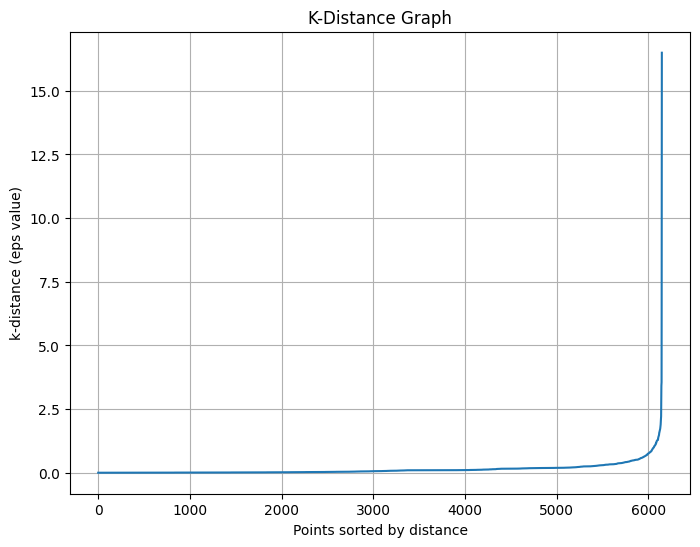

In [501]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [502]:
# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
from sklearn.cluster import DBSCAN


chosen_eps = 1.5  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

In [503]:
clusters = dbscan.fit_predict(X_scaled)

In [504]:
pd.Series(clusters).value_counts()

 0    4848
 2    1284
-1      11
 1       7
Name: count, dtype: int64

In [505]:
silhouette_avg = silhouette_score(X_scaled, clusters)
silhouette_avg

np.float64(0.5063002828941296)

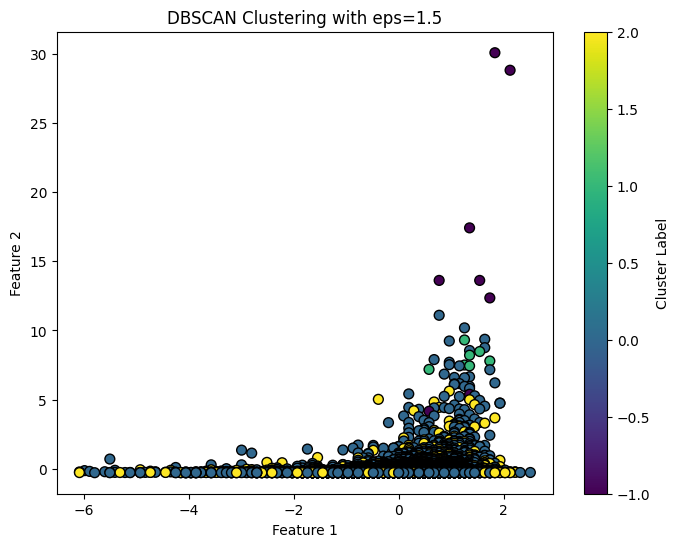

In [506]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()